## 前言
激活函数，就像神经元的开关，决定了输入信号能否被传递，以及以什么形式传递。

本文旨在梳理常见的20多种激活函数，包括数学公式、优劣势，并基于Python代码进行可视化。最后，对比各类激活函数的应用场景，给出选型指南。

In [3]:
# -*- coding: utf-8 -*-
"""
🔥 激活函数大全：可视化与实现
包含 20+ 个激活函数及其导数
支持一键绘图对比
"""

# 导入必要的库
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid  # scipy 的 sigmoid
import warnings
warnings.filterwarnings("ignore")

# 设置中文字体和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')  # 设置绘图风格
sns.set_context('notebook')

## 经典激活函数

In [4]:
# 定义输入范围
x = np.linspace(-10, 10, 1000)

# 定义画图函数(单张图)
def plot_activation(func, grad_func, name):
    y = func(x)
    dy = grad_func(x)
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=name, linewidth=1.5)
    plt.plot(x, dy, label=f"{name}'s derivative", linestyle='--', linewidth=1.5)
    plt.title(f'{name} Function and Its Derivative')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

import numpy as np
import matplotlib.pyplot as plt


# 定义画图函数（多张图，用于对比不同参数）
def plot_activations(functions, x):
    plt.figure(figsize=(10, 7))
    for func, grad_func, name in functions:
        y = func(x)
        dy = grad_func(x)
        plt.plot(x, y, label=name, linewidth=1.5)
        plt.plot(x, dy, label=f"{name}'s derivative", linestyle='--', linewidth=1.5)

    plt.title('Activation Functions and Their Derivatives')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

### Sigmoid
适用于二分类问题的输出层，将输出压缩到 (0,1) 区间表示概率。不推荐用于隐藏层，因易导致梯度消失。

$$ \sigma(x) = \frac{1}{1 + e^{-x}}


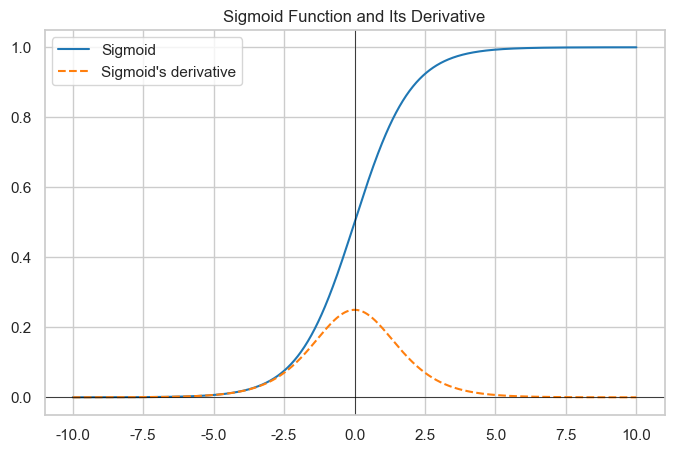

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

plot_activation(sigmoid, sigmoid_grad, 'Sigmoid')

### Tanh（双曲正切）
比 Sigmoid 更优的零中心化激活函数，适合隐藏层使用，尤其在 RNN 中仍有应用。但仍可能梯度消失。

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{2}{1 + e^{-2x}} - 1

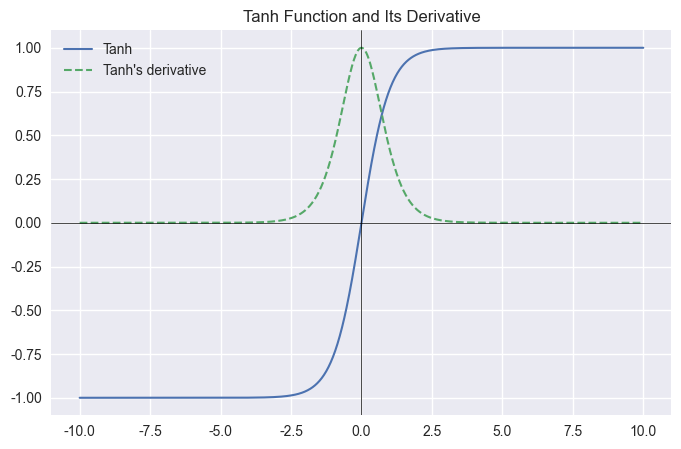

In [4]:
def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x)**2

plot_activation(tanh, tanh_grad, 'Tanh')

### Linear
主要用于回归任务的输出层，保持输出为原始实数，不进行非线性变换。不适合用在隐藏层（否则整个网络等价于单层线性模型，无法学习非线性特征）。在某些特定模型（如自编码器的中间层或策略网络）中也可能使用。

$$ \text{Linear}(x) = x

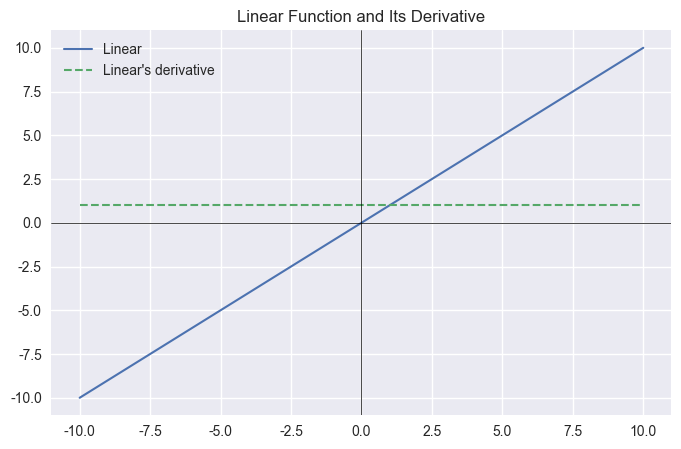

In [5]:
def linear(x):
    return x

def linear_grad(x):
    return np.ones_like(x)

plot_activation(linear, linear_grad, 'Linear')

### Softmax
多分类问题的输出层标准激活函数，将输出转化为概率分布。不用于隐藏层。

$$ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}

In [1]:
from mpl_toolkits.mplot3d import Axes3D

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))  # 数值稳定
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def softmax_grad(x):
    s = softmax(x).reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)  # Jacobian矩阵

# 生成输入数据（二维，便于可视化）
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
inputs = np.vstack([X.ravel(), Y.ravel()]).T

# 计算Softmax输出（取第一个维度作为输出值，因为Softmax输出是概率分布）
outputs = np.array([softmax(p)[0] for p in inputs]).reshape(X.shape)

# 计算梯度（取Jacobian矩阵的第一个对角线元素）
gradients = np.array([softmax_grad(p)[0, 0] for p in inputs]).reshape(X.shape)

# 绘制Softmax函数
fig = plt.figure(figsize=(12, 5))

# 1. Softmax函数图像
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, outputs, cmap='viridis', alpha=0.8)
ax1.set_title('Softmax (First Output Dimension)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('P(x1)')

# 2. Softmax梯度图像
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, gradients, cmap='plasma', alpha=0.8)
ax2.set_title('Gradient of Softmax (∂P(x1)/∂x1)')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('Gradient')

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

## ReLU 函数及其变体

### ReLU

$$ \text{ReLU}(x) = \max(0, x)

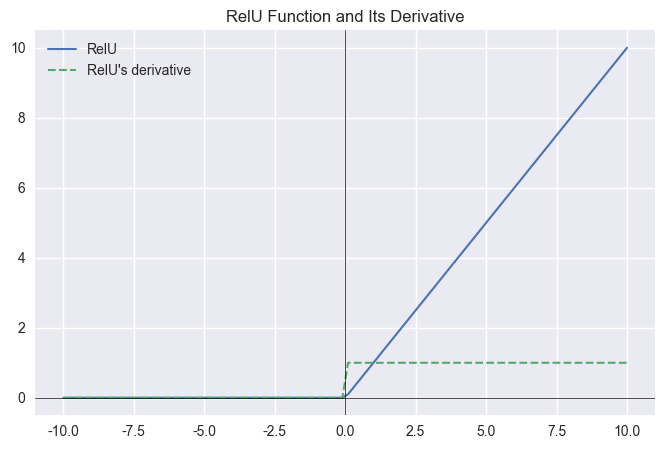

In [7]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0).astype(float)

plot_activation(relu, relu_grad, 'RelU')

### ReLU6
ReLU6 是 ReLU 的有界版本，输出限制在 [0, 6] 区间。主要用于移动端和轻量级网络（如 MobileNet、EfficientNet 的早期版本），其有界性有助于提升低精度推理（如量化）时的稳定性。也常见于强化学习（如 DQN）中，用于限制输出范围，防止训练波动。

$$ \text{ReLU6}(x) = \min(6, \max(0, x))

或：

$$ \text{ReLU6}(x) = \begin{cases}
0, & \text{if } x \leq 0 \\
x, & \text{if } 0 < x < 6 \\
6, & \text{if } x \geq 6
\end{cases}

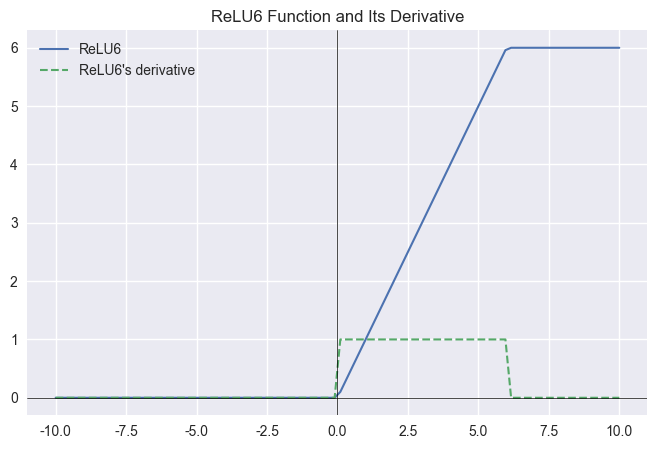

In [8]:
def relu6(x):
    return np.minimum(np.maximum(0, x), 6)

def relu6_grad(x):
    dx = np.zeros_like(x)
    dx[(x > 0) & (x < 6)] = 1
    return dx

plot_activation(relu6, relu6_grad, 'ReLU6')

### Leaky ReLU
Leaky ReLU 是对传统 ReLU 的改进，它试图解决“死亡 ReLU”问题，即某些神经元可能永远不会再激活的问题。

$$ \text{LeakyReLU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
\alpha x, & \text{otherwise}
\end{cases} \quad (\alpha \text{ 通常固定取 } 0.01)

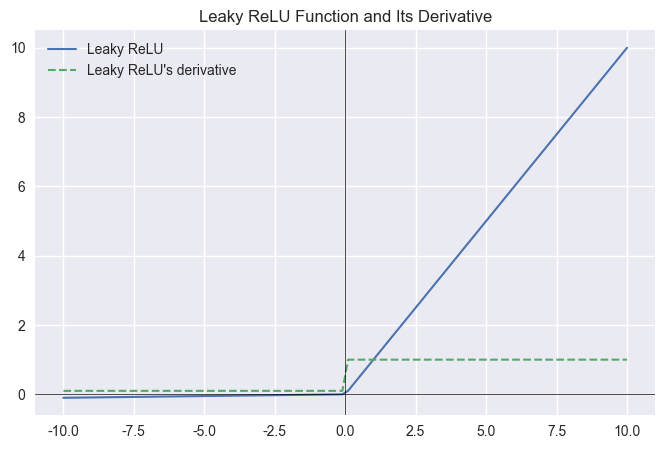

In [9]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def leaky_relu_grad(x, alpha=0.1):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

plot_activation(leaky_relu, leaky_relu_grad, 'Leaky ReLU')

### PReLU（Parametric ReLU）
注意厘清：Leaky ReLU 是“固定小斜率”的 ReLU 改进，而 PReLU 将该斜率变为可学习参数，更具表达能力。

$$ \text{PReLU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
\alpha x, & \text{otherwise}
\end{cases}

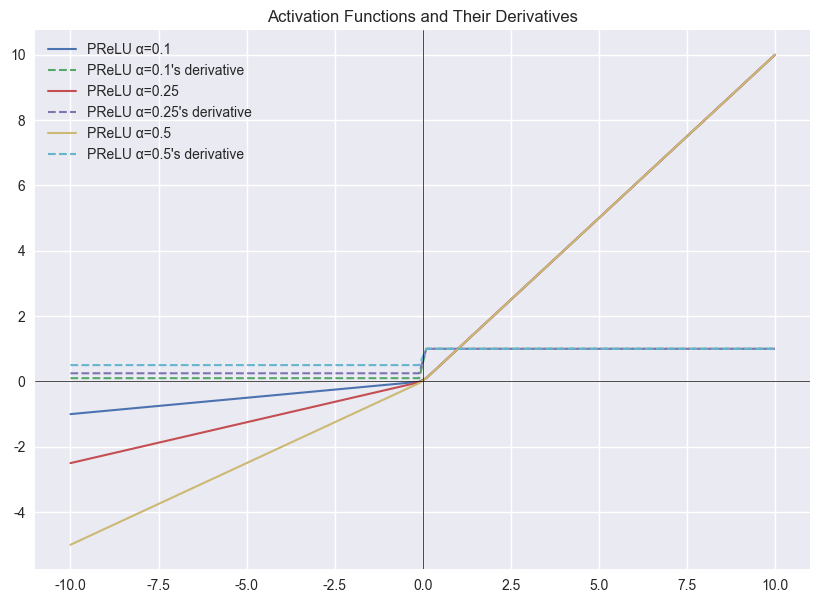

In [10]:
def prelu(x, alpha=0.25):
    return np.where(x > 0, x, alpha * x)

def prelu_grad(x, alpha=0.25):
    return np.where(x > 0, 1, alpha)

functions_to_plot = [
    (lambda x: prelu(x, 0.1), lambda x: prelu_grad(x, 0.1), 'PReLU α=0.1'),
    (lambda x: prelu(x, 0.25), lambda x: prelu_grad(x, 0.25), 'PReLU α=0.25'),
    (lambda x: prelu(x, 0.5), lambda x: prelu_grad(x, 0.5), 'PReLU α=0.5')
]
plot_activations(functions_to_plot, x)


### RReLU
RReLU（Randomized ReLU）是一种在训练时使用随机斜率的变体ReLU激活函数，而在测试时则采用固定的斜率。其主要目的是为了减少过拟合并解决“死亡ReLU”问题。

由于 RReLU 在训练时使用的是一个区间内的随机值，而测试时使用的是固定值。为了简化起见，这里使用一个确定性的斜率（例如训练过程中使用的平均斜率）。

以下代码实现了 RReLU 函数及其导数，并使用了一个介于 lower 和 upper 之间的固定斜率来代替随机选择的过程，以便进行可视化。

在实际应用中，对于每个负输入值，斜率会在给定范围内随机选择，但在测试或推理阶段，通常会使用所有可能斜率的平均值。

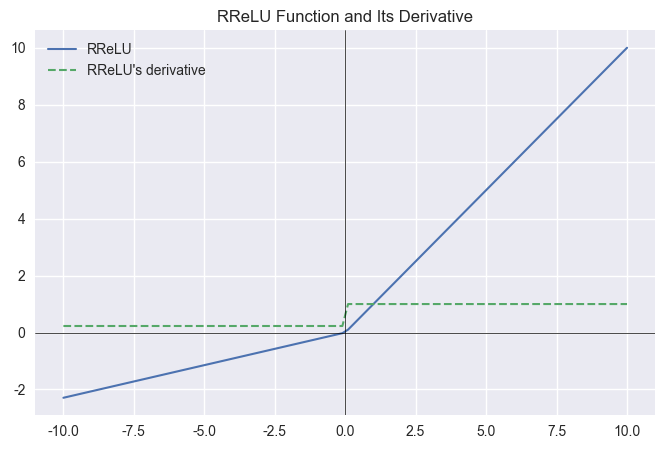

In [11]:
def rrelu(x, lower=1/8., upper=1/3.):
    # 在实际应用中，这里的a应该是在[lower, upper]之间随机选取的
    # 但为了绘图方便，我们取平均值作为固定的a
    a = (lower + upper) / 2
    return np.where(x >= 0, x, a * x)

def rrelu_grad(x, lower=1/8., upper=1/3.):
    a = (lower + upper) / 2
    dx = np.ones_like(x)
    dx[x < 0] = a
    return dx

plot_activation(lambda x: rrelu(x), lambda x: rrelu_grad(x), 'RReLU')

### ELU
能产生负值输出，使激活均值接近零，加速收敛。适合深层网络，训练稳定性优于 ReLU，但计算稍慢。

$$ \text{ELU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
\alpha (e^x - 1), & \text{otherwise}
\end{cases}

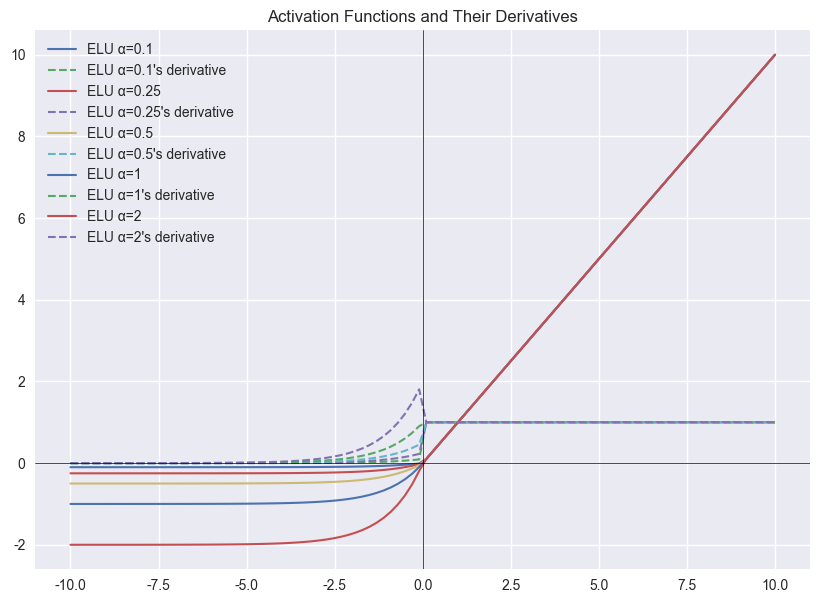

In [12]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_grad(x, alpha=1.0):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

functions_to_plot = [
    (lambda x: elu(x, 0.1), lambda x: elu_grad(x, 0.1), 'ELU α=0.1'),
    (lambda x: elu(x, 0.25), lambda x: elu_grad(x, 0.25), 'ELU α=0.25'),
    (lambda x: elu(x, 0.5), lambda x: elu_grad(x, 0.5), 'ELU α=0.5'),
    (lambda x: elu(x, 1), lambda x: elu_grad(x,1), 'ELU α=1'),
    (lambda x: elu(x, 2), lambda x: elu_grad(x,2), 'ELU α=2')
]
plot_activations(functions_to_plot, x)


### SELU（Scaled Exponential Linear Units）
一种自归一化激活函数，它能够使得神经网络的输出在一定条件下自动趋近于零均值和单位方差，从而有助于加速训练过程，并且有可能提高模型的性能。SELU激活函数是由Günter Klambauer等人在2017年提出的。

$$ \text{SELU}(x) = \lambda \begin{cases}
x, & \text{if } x > 0 \\
\alpha (e^x - 1), & \text{otherwise}
\end{cases}

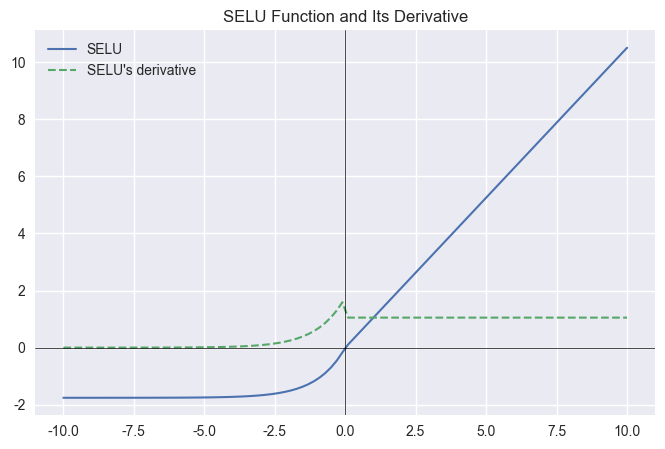

In [13]:
# SELU 参数（论文中推荐值）
lambda_s = 1.0507009873554804934193349852946
alpha_s = 1.673261549988240216825385979984

def selu(x, lambda_=1.0507009873554804934193349852946, alpha=1.673261549988240216825385979984):
    return lambda_ * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu_grad(x, lambda_=1.0507009873554804934193349852946, alpha=1.673261549988240216825385979984):
    return lambda_ * np.where(x > 0, 1, alpha * np.exp(x))

# 调用plot_activation绘制SELU及其导数
plot_activation(lambda x: selu(x), lambda x: selu_grad(x), 'SELU')

### CELU
CELU 是 ELU 的改进版本，保证了在 x = 0 处连续可导（平滑性优于 ELU），有助于优化稳定性。与 ELU 类似，能产生负值激活，促进神经元平均输出接近零，适合深层网络训练。在某些对梯度平滑性要求较高的任务中可作为 ReLU、ELU 的替代选择，但计算成本略高。

$$ \text{CELU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
\alpha \left( e^{x / \alpha} - 1 \right), & \text{otherwise}
\end{cases}

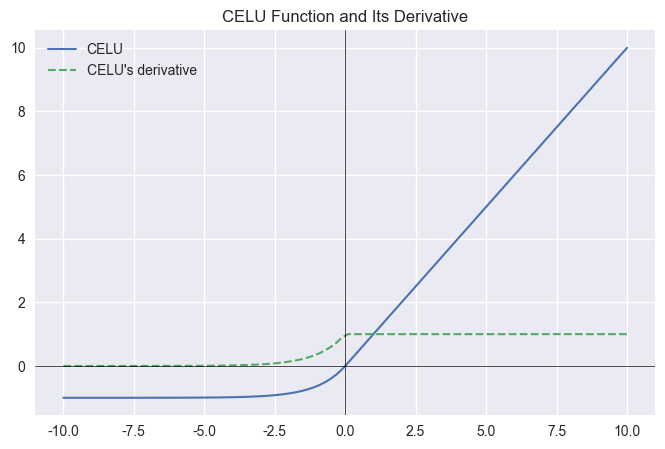

In [14]:
def celu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x / alpha) - 1))

def celu_grad(x, alpha=1.0):
    dx = np.ones_like(x)
    dx[x <= 0] = np.exp(x[x <= 0] / alpha)
    return dx

plot_activation(celu, celu_grad, "CELU")

### GELU （Gaussian Error Linear Unit，高斯误差线性单元）
Transformer 等现代架构（如 BERT）的标准激活函数，平滑且非单调，性能优于 ReLU，在 NLP 和大模型中广泛使用。
该激活函数由 Dan Hendrycks 和 Kevin Gimpel 在2016年提出。它在深度学习模型中（如Transformer、BERT等）表现优异，逐渐成为ReLU的替代选择。

$$ \text{GELU}(x) = x \cdot \Phi(x) = x \cdot \frac{1}{2} \left[1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right]



其中，
$$ \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} \, dt

可以用双曲正切函数（tanh）近似表示，常见形式为：

$$ \mathrm{erf}(x) \approx \tanh\left(a x + b x^3\right)

因此，实际计算中经常使用近似公式：

$$ \text{GELU}(x) \approx 0.5x \left(1 + \tanh\left[\sqrt{\frac{2}{\pi}}(x + 0.044715x^3)\right]\right)

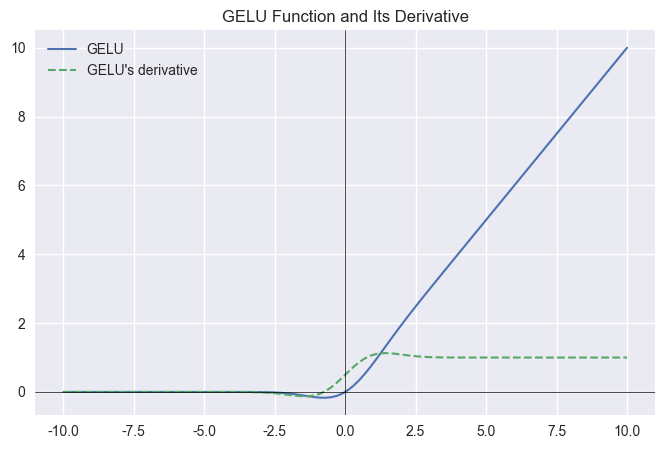

In [15]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def gelu_grad(x):
    # 导数计算较为复杂，这里简化处理
    return 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))) + \
           0.5 * x * (1 - np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))**2) * \
           (np.sqrt(2 / np.pi) * (1 + 0.134145 * np.power(x, 2)))

plot_activation(gelu, gelu_grad, "GELU")

## 现代高性能激活函数

### Swish
由 Google 提出，在某些深度模型中表现优于 ReLU，尤其在注意力机制和移动端模型中有效。

$$ \text{Swish}(x) = x \cdot \sigma(\beta x)

其中，

$$ \sigma(z) = \frac{1}{1 + e^{-z}}

而 β 是一个可学习参数。

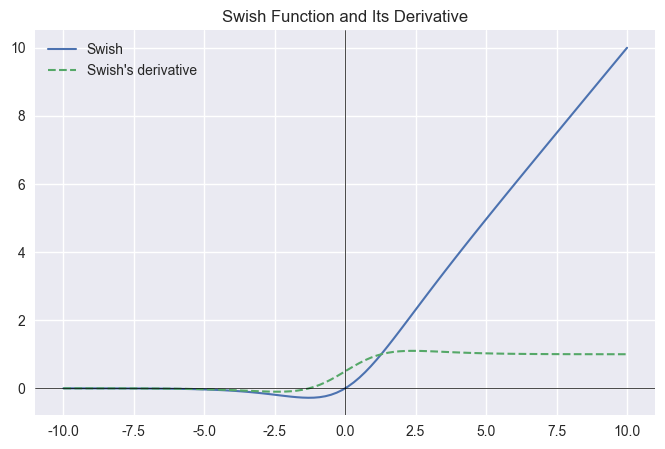

In [16]:
def swish(x, beta=1):
    return x / (1 + np.exp(-beta*x))

def swish_grad(x, beta=1):
    s = 1 / (1 + np.exp(-beta*x))
    f = x * s
    return f + (s * (1 - f)) * beta

plot_activation(swish, swish_grad, "Swish")


### SiLU（Sigmoid Linear Unit）
SiLU 是 Swish 激活函数在 (beta=1) 时的特例。

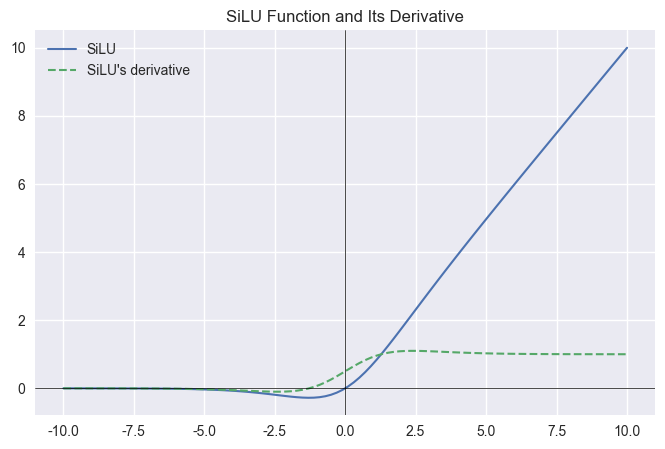

In [17]:
def silu(x):
    return x * sigmoid(x)

def silu_grad(x):
    s = sigmoid(x)
    return s * (1 + x * (1 - s))

plot_activation(silu, silu_grad, 'SiLU')

### E-Swish
E-Swish 是 SiLU 的缩放版本，通过超参数 (beta) 增强非线性表达能力。

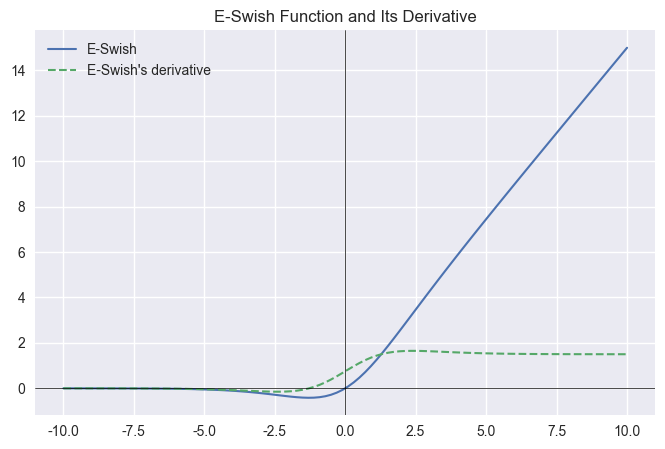

In [18]:
def eswish(x, beta=1.5):
    return beta * x * sigmoid(x)

def eswish_grad(x, beta=1.5):
    s = sigmoid(x)
    return beta * s * (1 + x * (1 - s))

plot_activation(lambda x: eswish(x, beta=1.5), lambda x: eswish_grad(x, beta=1.5), 'E-Swish')

### Mish
一种自门控（self-gated）的非单调激活函数，由Diganta Misra在2019年提出。它在深度学习中表现出色，尤其在图像分类等任务中，性能常优于ReLU及其变体（如Swish、Leaky ReLU等）。

$$ \text{Mish}(x) = x \cdot \tanh(\text{softplus}(x)) = x \cdot \tanh(\ln(1 + e^x))

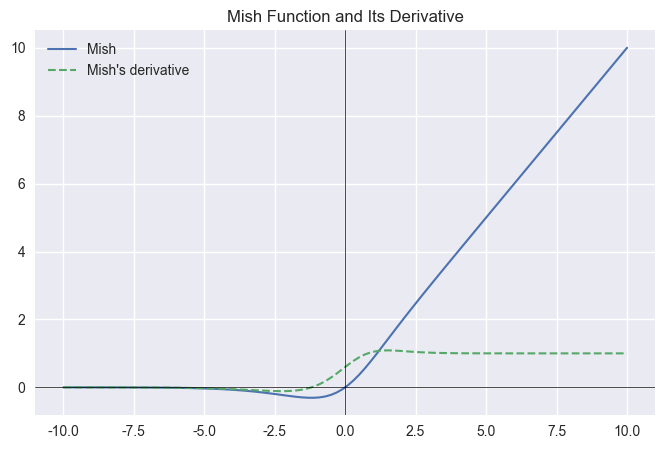

In [19]:
def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def mish_grad(x):
    sp = np.log(1 + np.exp(x))
    tanh_sp = np.tanh(sp)
    sech2_sp = 1 - tanh_sp**2
    return tanh_sp + x * sech2_sp * sigmoid(x)

plot_activation(mish, mish_grad, 'Mish')

### β-Mish

当 beta=1.5 时，曲线比标准 Mish 更陡，非线性更强。
负输入时输出接近 0，正输入时增长快于 ReLU。
梯度在 x=0 附近最高峰，两端缓慢衰减。

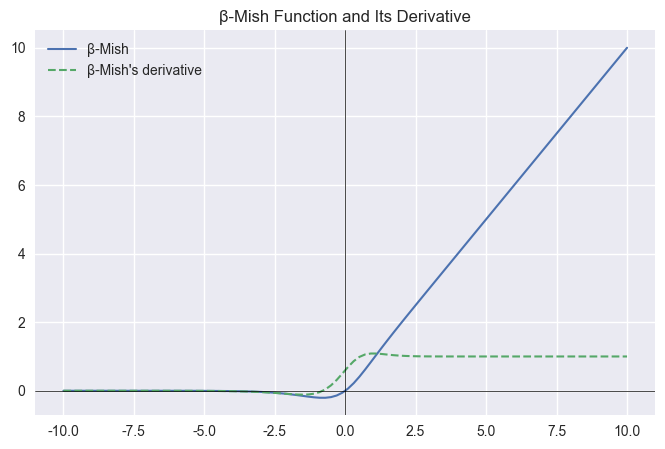

In [20]:
def beta_mish(x, beta=1.5):
    """
    β-Mish 激活函数：f(x) = x * tanh(ln(1 + exp(beta * x)))
    推广自 Mish 激活函数，通过 beta 参数控制非线性强度。
    """
    return x * np.tanh(np.log(1 + np.exp(beta * x)))

def beta_mish_grad(x, beta=1.5):
    """
    β-Mish 的梯度（使用链式法则，数值更稳定）
    """
    # 避免 exp 溢出：对大输入使用渐近近似
    def softplus_stable(x):
        return np.where(x > 20, x, np.log(1 + np.exp(x)))
    
    sp = softplus_stable(beta * x)  # ln(1 + exp(beta*x))
    t = np.tanh(sp)
    
    # tanh'(x) = 1 - tanh(x)^2
    dtanh_dx = 1 - t**2
    # softplus'(x) = sigmoid(beta*x)
    dsigmoid_dx = beta * sigmoid(beta * x)
    
    # 链式法则：f'(x) = t + x * dtanh_dx * dsigmoid_dx
    return t + x * dtanh_dx * dsigmoid_dx

plot_activation(lambda x: beta_mish(x, beta=1.5), 
                lambda x: beta_mish_grad(x, beta=1.5), 
                'β-Mish')

### SQNL（Square Nonlinearity）
该激活函数使用平方算子引入所需的非线性。该激活函数的特点是计算操作次数更少。该函数有效性的关键在于其在多层感知器人工神经网络架构问题中的收敛速度更快。此外，该函数的导数是线性的，因此梯度计算速度更快。

论文：https://ieeexplore.ieee.org/document/8489043

$$ \text{SQNL}(x) = \begin{cases}
1, & \text{if } x > 2 \\
x - \frac{x^2}{4}, & \text{if } 0 \leq x \leq 2 \\
x + \frac{x^2}{4}, & \text{if } -2 \leq x < 0 \\
-1, & \text{if } x < -2
\end{cases}

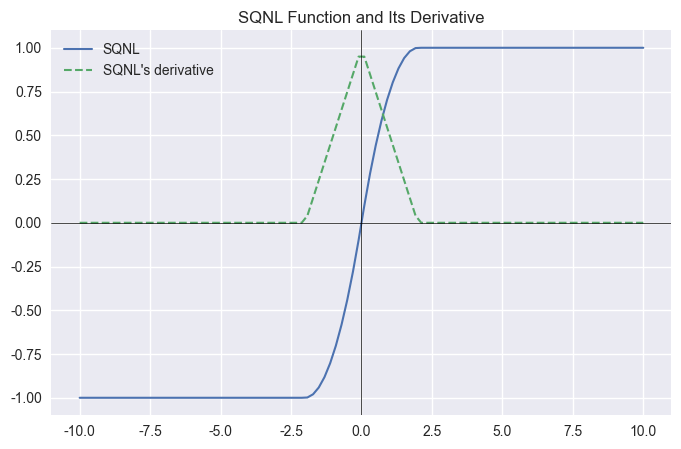

In [21]:
def sqnl(x):
    return np.where(x > 2, 1,
           np.where(x >= 0, x - (x**2)/4,
           np.where(x >= -2, x + (x**2)/4, -1)))

def sqnl_grad(x):
    return np.where(x > 2, 0,
           np.where(x >= 0, 1 - x/2,
           np.where(x >= -2, 1 + x/2, 0)))

plot_activation(sqnl, sqnl_grad, 'SQNL')

### Bent Identity
Bent Identity 是一种平滑、非单调、可微、无上界的激活函数，输出接近输入值但带有轻微非线性弯曲（“bent”）。适用于回归任务或自编码器的隐藏层，尤其在需要保留输入结构的同时引入轻微非线性变换的场景。其导数始终大于 0.5，避免梯度消失，适合浅层网络或需要稳定梯度的训练过程。由于计算涉及平方根，速度较慢，不常用于大规模深度网络。

文章：https://www.gabormelli.com/RKB/Bent_Identity_Activation_Function

$$ \text{BentIdentity}(x) = \frac{\sqrt{x^2 + 1} - 1}{2} + x

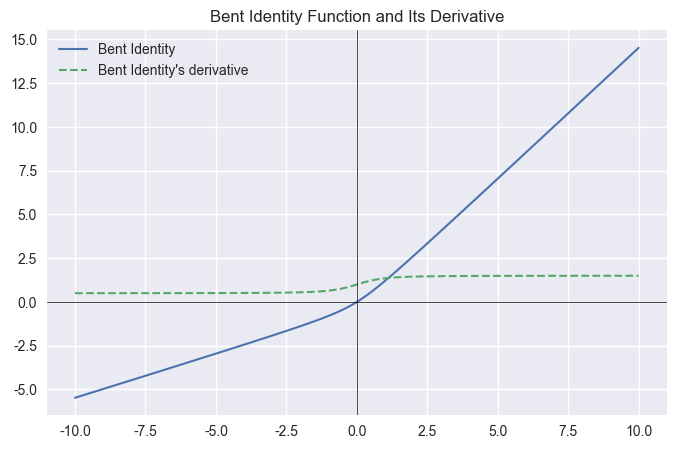

In [22]:
def bent_identity(x):
    return (np.sqrt(x**2 + 1) - 1) / 2 + x

def bent_identity_grad(x):
    return x / (2 * np.sqrt(x**2 + 1)) + 1

plot_activation(bent_identity, bent_identity_grad, 'Bent Identity')

## 门控与组合型激活函数

###  GLU (Gated Linear Unit)
GLU 是一种门控机制激活函数，通过将输入的一部分作为“门”来调制另一部分的输出，增强了模型的表达能力。广泛应用于 Transformer 变体（如 GLU Variants in GLU-Transformer）、序列模型（如 CNN-based NLP 模型）和语音任务中。相比传统激活函数，GLU 能更灵活地控制信息流动，提升建模能力。常见变体包括 SwiGLU、ReLU-Glu 等，在大模型（如 Llama 系列）中表现优异。

$$ \text{GLU}(x) = x \cdot \sigma(W_g x + b_g)

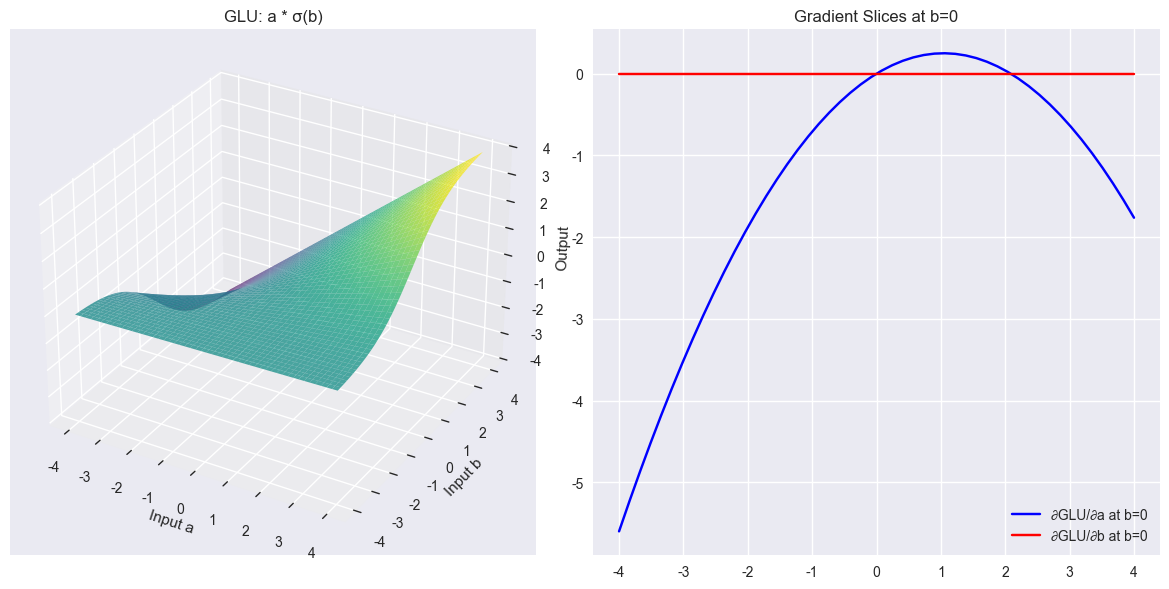

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def glu_2d(x):
    """二维输入版本的GLU"""
    a, b = x[..., 0], x[..., 1]  # 分割输入的两个维度
    return a * sigmoid(b)  

def plot_glu_2d():
    # 创建二维输入网格
    x = np.linspace(-4, 4, 50)
    y = np.linspace(-4, 4, 50)
    X, Y = np.meshgrid(x, y)
    xy = np.stack([X, Y], axis=-1)  # 组合成(50,50,2)的输入
    
    # 计算GLU输出
    Z = glu_2d(xy)
    
    # 3D可视化
    fig = plt.figure(figsize=(12, 6))
    
    # 1. 激活函数曲面
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax1.set_title('GLU: a * σ(b)')
    ax1.set_xlabel('Input a')
    ax1.set_ylabel('Input b')
    ax1.set_zlabel('Output')
    
    # 2. 梯度场切片（固定b=0时的梯度）
    ax2 = fig.add_subplot(122)
    b_zero_idx = np.abs(y).argmin()  # 找到b=0的索引
    grad_at_b0 = Z[b_zero_idx] * (1 - Z[b_zero_idx])  # ∂(aσ(b))/∂a = σ(b)
    ax2.plot(x, grad_at_b0, label='∂GLU/∂a at b=0', color='blue')
    ax2.plot(x, np.zeros_like(x), label='∂GLU/∂b at b=0', color='red') 
    ax2.set_title('Gradient Slices at b=0')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# 执行可视化
plot_glu_2d()

### Maxout
Maxout 是一种分段线性激活函数，定义为多个线性变换的最大值。它是一种可学习的分段线性激活函数，具有很强的表达能力——理论上，只要有足够多的片段，它可以逼近任意凸函数。它与 Dropout 结合使用时表现优异（在《Dropout: A Simple Way to Prevent Neural Networks from Overfitting》中被验证），曾广泛用于全连接网络。

但由于每个 Maxout 单元需要 k 倍参数（即 k 个 W_i, b_i），参数量大、计算开销高，因此在现代 CNN 或大模型中较少使用。适合对模型表达力要求高、但对计算资源不敏感的研究性任务。

$$ \text{Maxout}(x) = \max_{i \in [1, k]} (W_i x + b_i)

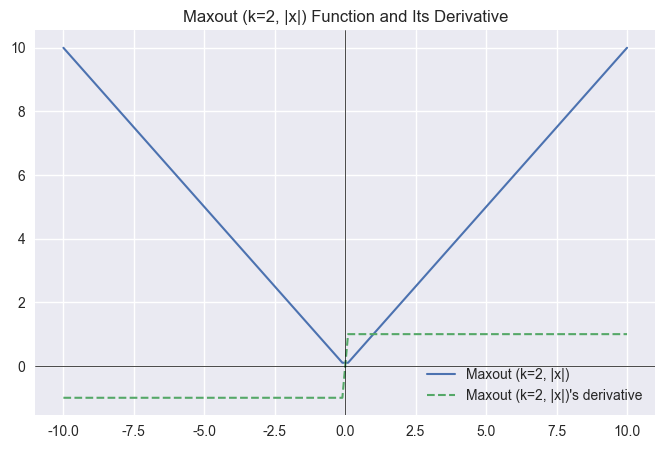

In [24]:
def maxout(x, w1=1.0, w2=-1.0, b1=0.0, b2=0.0):
    """
    Maxout 简化版（k=2）用于 1D 可视化：
    f(x) = max(w1*x + b1, w2*x + b2)
    
    常用设置：w1=1, w2=-1 → f(x) = max(x, -x) = |x|（绝对值）
    """
    return np.maximum(w1 * x + b1, w2 * x + b2)

def maxout_grad(x, w1=1.0, w2=-1.0, b1=0.0, b2=0.0):
    """
    Maxout 梯度：根据哪个线性函数被激活返回对应权重
    """
    linear1 = w1 * x + b1
    linear2 = w2 * x + b2
    return np.where(linear1 >= linear2, w1, w2)

# 可视化：f(x) = max(x, -x) = |x|
plot_activation(lambda x: maxout(x, w1=1.0, w2=-1.0),
                lambda x: maxout_grad(x, w1=1.0, w2=-1.0),
                'Maxout (k=2, |x|)')

### SReLU (S-shaped Rectified Linear Unit)
SReLU 是一种参数自适应的 S 形激活函数，能够根据数据自动学习激活曲线的形状，兼具线性和饱和特性。适用于需要灵活非线性变换的全连接网络或卷积网络，在某些图像分类和回归任务中表现优于 ReLU 和 ELU。其设计目标是模拟生物神经元的响应特性，在深度模型中可提升表达能力。但由于引入了四个可学习参数（每通道或共享），增加了模型复杂度，训练成本较高，目前应用不如 ReLU 或 GELU 广泛。

$$ \text{SReLU}(x) = \begin{cases}
t_r + a_r (x - t_r), & \text{if } x \geq t_r \\
x, & \text{if } t_l < x < t_r \\
t_l + a_l (x - t_l), & \text{if } x \leq t_l
\end{cases}

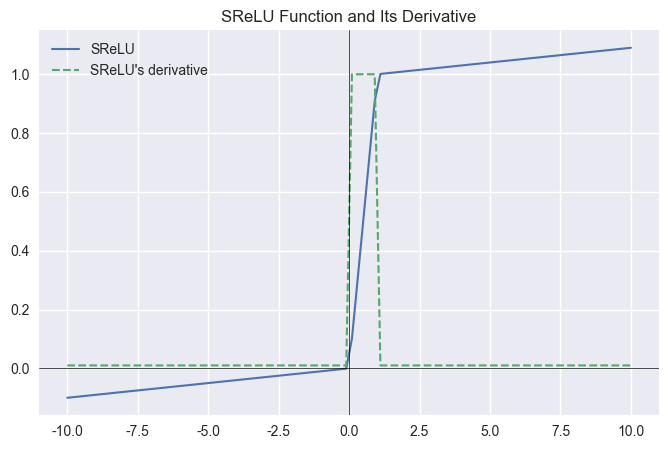

In [25]:
def srelu(x, tl=0.0, al=0.01, tr=1.0, ar=0.01):
    """
    SReLU: S-shaped Rectified Linear Unit
    分段函数，模拟 S 形激活。
    公式：
        f(x) = 
            tl + al*(x - tl)   if x <= tl
            x                  if tl < x < tr
            tr + ar*(x - tr)   if x >= tr
    """
    return np.where(x <= tl, tl + al * (x - tl),
           np.where(x < tr, x,
                    tr + ar * (x - tr)))

def srelu_grad(x, tl=0.0, al=0.01, tr=1.0, ar=0.01):
    """
    SReLU 梯度
    """
    return np.where(x <= tl, al,
           np.where(x < tr, 1.0, ar))

plot_activation(lambda x: srelu(x, tl=0.0, al=0.01, tr=1.0, ar=0.01),
                lambda x: srelu_grad(x, tl=0.0, al=0.01, tr=1.0, ar=0.01),
                'SReLU')

### CReLU (Concatenated ReLU)

$$ \text{CReLU}(x) = \text{concat}(\text{ReLU}(x),\ \text{ReLU}(-x))

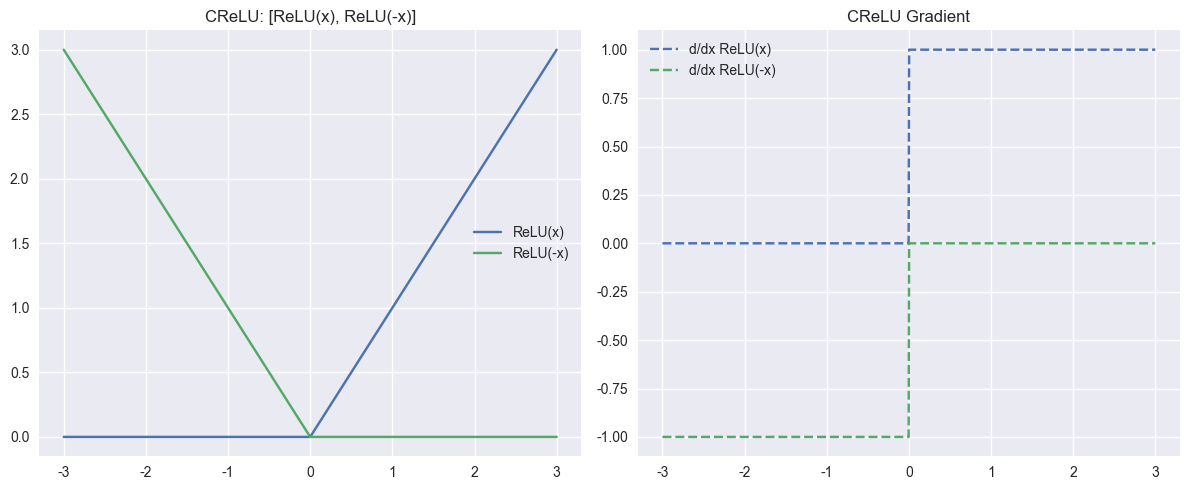

In [26]:
def crelu(x):
    """
    CReLU: Concatenated ReLU
    f(x) = [ReLU(x), ReLU(-x)]
    输出维度翻倍。
    """
    return np.concatenate([relu(x), relu(-x)], axis=-1)

def crelu_grad(x):
    """
    CReLU 梯度：返回 [d/dx ReLU(x), d/dx ReLU(-x)]
    
    注意：ReLU(-x) 对 x 的导数是：
        - 如果 x < 0: ReLU(-x) = -x, 导数为 -1
        - 如果 x >= 0: ReLU(-x) = 0, 导数为 0
        => 即: -LeakyReLU(-x, negative_slope=1) 或 -H(x<0)
    
    所以：
        d/dx ReLU(-x) = -1 if x < 0 else 0
    """
    grad_positive = relu_grad(x)           # ReLU(x) 的梯度: 1 if x > 0 else 0
    grad_negative = np.where(x < 0, -1, 0) # ReLU(-x) 的梯度: -1 if x < 0 else 0
    
    return np.concatenate([grad_positive, grad_negative], axis=-1)

def plot_crelu_separate():
    x = np.linspace(-3, 3, 1000)
    y = crelu(x)
    grad = crelu_grad(x)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, y[:len(x)], label='ReLU(x)')
    plt.plot(x, y[len(x):], label='ReLU(-x)')
    plt.title('CReLU: [ReLU(x), ReLU(-x)]')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(x, grad[:len(x)], label="d/dx ReLU(x)", linestyle='--',)
    plt.plot(x, grad[len(x):], label="d/dx ReLU(-x)", linestyle='--',)
    plt.title('CReLU Gradient')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_crelu_separate()

## 特殊用途与研究型函数

### Softplus
Softplus 是 ReLU 的平滑近似版本，输出始终为正，且处处连续可导。当 x 很大时趋近于 x，当 x 很小时趋近于 0。适用于需要平滑、非线性、非饱和（无上界）激活的场景，如：
- 变分自编码器（VAE）中用于生成方差参数（保证正值）;
- 强化学习中的策略网络输出层;
- 需要避免 ReLU “神经元死亡” 问题但又希望保持单侧软饱和特性的任务。

其主要缺点是计算开销较大（涉及指数和对数），且在 x 很大时可能产生数值溢出，需做稳定处理（如 torch.nn.Softplus 内部实现会做裁剪）。作为理论性质良好的激活函数，常用于概率建模和生成模型中。

$$ \text{Softplus}(x) = \ln(1 + e^x)

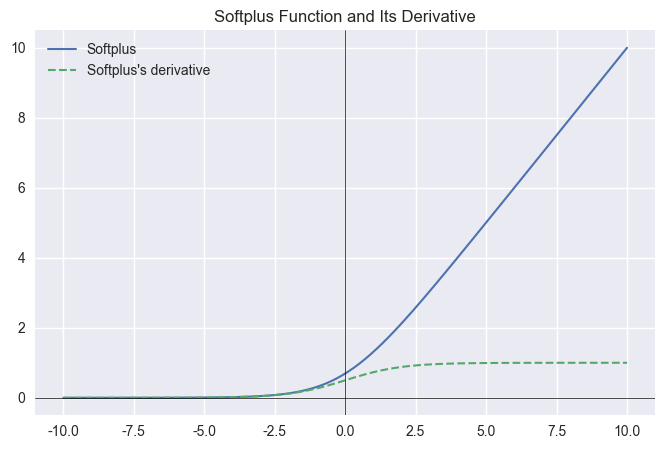

In [27]:
def softplus(x):
    return np.log(1 + np.exp(x))

def softplus_grad(x):
    return sigmoid(x)

plot_activation(softplus, softplus_grad, 'Softplus')

### Softsign
Softsign 是 Tanh 的替代品，输出范围 (−1,1)，具有平滑的S形曲线但计算更简单。

应用场景
- 替代Tanh/Sigmoid：需平滑饱和激活时（如RNN、生成模型）。
- 对抗梯度消失：梯度衰减比Tanh更缓慢，适合深层网络。
- 低精度训练：计算无指数运算，对量化友好。

优点：
- 计算高效：仅需一次除法和绝对值运算（比Tanh快约2倍）。
- 梯度平缓：最大梯度为1（对比Tanh的0.25），缓解梯度消失。
- 输出归一化：天然将输入压缩到(−1,1)，避免数值爆炸。

缺点：
- 饱和区梯度趋零：当∣x∣→∞ 时梯度接近0，可能拖慢训练。
- 非零中心化：输出均值不为零（类似Sigmoid），需配合BatchNorm。
- 表达能力有限：非线性弱于Swish等新型激活函数。

$$ \text{Softsign}(x) = \frac{x}{1 + |x|}

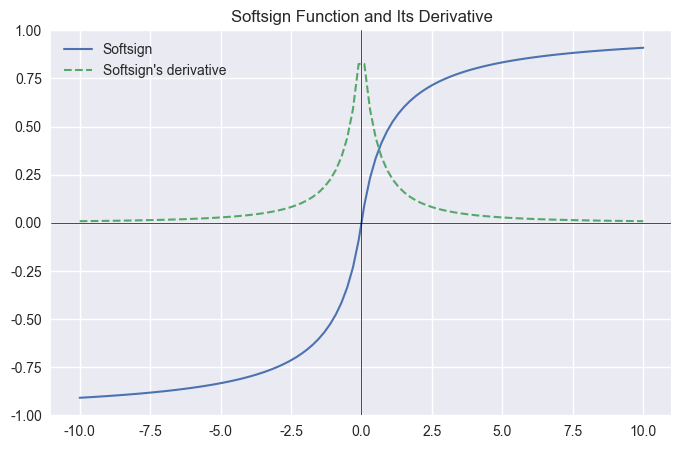

In [28]:
def softsign(x):
    return x / (1 + np.abs(x))

def softsign_grad(x):
    return 1 / ((1 + np.abs(x)) ** 2)

plot_activation(softsign, softsign_grad, "Softsign")

### Gaussian
Gauss 是一种径向基函数（RBF）型激活函数，输出随输入远离零点而迅速衰减至 0，具有局部响应特性。主要用于：

- 径向基函数网络（RBF Networks）的隐藏层;
- 需要局部敏感性建模的任务（如函数逼近、时间序列预测）;
- 注意力机制中的相似度加权（与高斯核结合）。

其最大特点是非全局单调，对中心区域敏感，对远端输入抑制强烈。但由于其输出快速饱和，梯度在 |x| > 1 后极小，容易导致梯度消失，且不适用于深层前馈网络的通用隐藏层。现代深度学习中较少使用，但在特定结构（如 RBF-NN、某些神经隐式场）中仍有价值。

$$ \text{Gauss}(x) = e^{-x^2}

或更一般的形式（带参数）：

$$ \text{Gauss}(x) = \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)

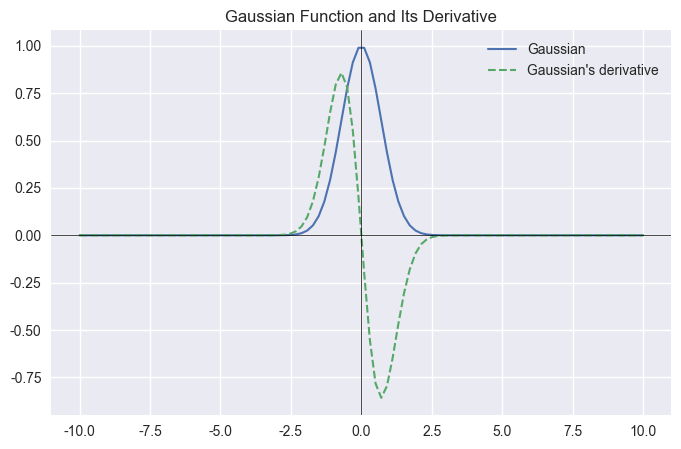

In [29]:
def gaussian(x):
    return np.exp(-np.power(x, 2))

def gaussian_grad(x):
    return -2 * x * np.exp(-np.power(x, 2))

plot_activation(gaussian, gaussian_grad, "Gaussian")

### Sine
Sine 是一种周期性、有界、平滑振荡的激活函数。与 ReLU、Sigmoid 等传统激活函数不同，它具有无限多的极值点和零点，能自然地建模周期性或高频信号。

主要适用于：
- 神经隐式表示（Neural Implicit Representations），如 SIREN（Sinusoidal Representation Networks），用于表示图像、音频、3D 形状等连续信号；
- 函数逼近任务，尤其是包含周期性、振荡行为的物理系统建模（如波函数、机械振动）；
- 需要高频率细节重建的场景（如超分辨率、神经辐射场 NeRF 的变体）。

虽然不适用于通用深度分类网络，但在特定科学计算和表示学习任务中表现出色。

$$ \text{Sine}(x) = \sin(x)

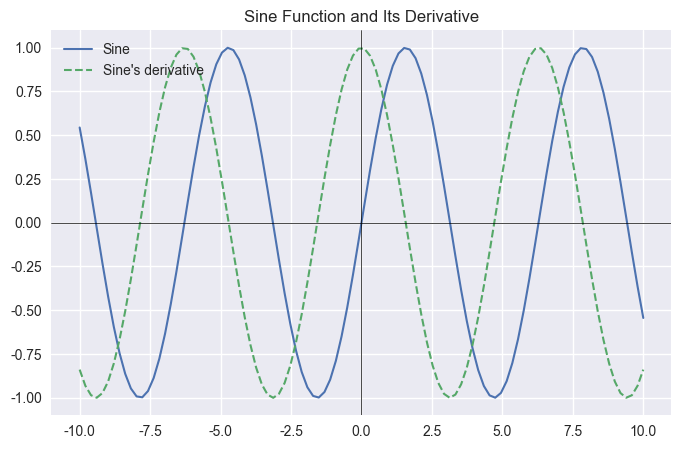

In [30]:
def sine(x):
    return np.sin(x)

def sine_grad(x):
    return np.cos(x)

plot_activation(sine, sine_grad, "Sine")

### Cosine
Cosine 是一种周期性、有界、偶函数的激活函数，与 Sine 类似，输出在 [-1, 1] 之间振荡，具有平滑性和无限可导性。

虽然不作为标准神经网络的通用激活函数使用，但在以下特定场景中有应用价值：
- 周期性信号建模：在函数逼近任务中，用于表示具有固定周期的连续信号（如音频、电磁波）；
- 位置编码的替代或补充：在 Transformer 或神经隐式场中，与 Sine 配合使用构建更丰富的周期基函数；
- 对比学习中的相似度建模：cos(x) 本身是余弦相似度的核心，某些自定义层可能直接使用 cos(x) 作为非线性变换；
- 神经隐式表示（Neural Implicit Fields）：与 Sine 一起用于构建高频基函数，例如在 Fourier Feature Networks 中作为输入映射的一部分。

注意：与 Sine 类似，cos(x) 作为激活函数时对权重初始化敏感，且其全局振荡特性可能导致训练不稳定。它不适用于通用前馈网络的隐藏层，仅在特定结构或表示学习任务中使用。

与 Sine 的区别：cos(x) = sin(x + π/2)，即余弦是正弦的相位偏移版本。在建模能力上两者等价，但 cos(0) = 1，而 sin(0) = 0，因此 cos(x) 在零点有最大响应，更适合需要“中心对称高响应”的场景。

$$ \text{Cosine}(x) = \cos(x)

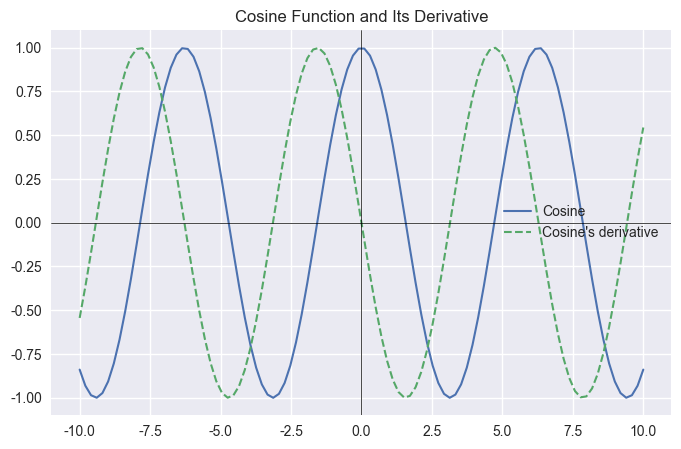

In [31]:
def cosine(x):
    return np.cos(x)

def cosine_grad(x):
    return -np.sin(x)

plot_activation(cosine, cosine_grad, "Cosine")

### Sinc (归一化或非归一化正弦函数)

Sinc 是一种振荡衰减型激活函数，具有无限支撑但随 |x| 增大而幅度减小。其特性源于信号处理中的理想低通滤波器和插值核。

特点：中心在 0 处有一个主峰，向两边衰减并振荡，幅度逐渐减小。

虽然在标准深度学习中极少使用，但在以下特定领域有潜在价值：
- 信号与图像重建任务：在神经隐式表示中用于建模带限信号（band-limited signals），理论上可完美重建奈奎斯特频率以下的信号；
- 插值网络：设计用于上采样或超分辨率的网络中，作为先验引导的激活函数；
- 物理信息神经网络（PINN）：在需要满足特定频域约束的微分方程求解中，Sinc 的频域稀疏性可能带来优势；
- 傅里叶相关架构：作为输入特征映射的一部分，增强模型对周期性和频率结构的感知能力。

注意：
- Sinc 函数在 x = 0 处不可导（需特殊处理），且存在多个零点和振荡，容易导致梯度不稳定；
- 计算开销较大（涉及 sin 和除法），且在 |x| 较大时梯度接近零，易造成训练困难；
- 目前仍属研究性激活函数，未在主流模型中广泛应用。

总体来说，Sinc 是一种理论性质优良但训练挑战大的激活函数，适用于对信号保真度要求高的科学计算任务，不适合通用深度网络。

归一化形式：

$$ \text{Sinc}(x) = \begin{cases}
\frac{\sin(\pi x)}{\pi x}, & \text{if } x \neq 0 \\
1, & \text{if } x = 0
\end{cases}

非归一化形式：

$$ \text{Sinc}(x) = \begin{cases}
\frac{\sin(x)}{x}, & \text{if } x \neq 0 \\
1, & \text{if } x = 0
\end{cases}

有时也记作：

$$ \text{unscaled sinc}

在数学和物理中常见非归一化形式，而在信号处理（尤其是数字信号处理）中通常使用归一化形式。

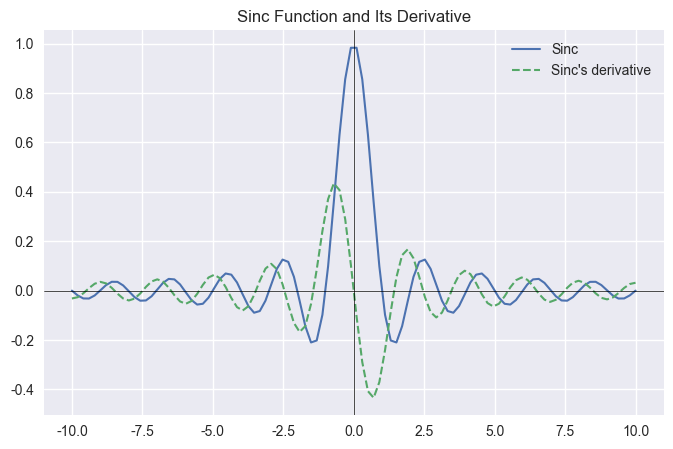

In [32]:
def sinc(x):
    # 避免除以零，对于 x=0 的情况，sinc 函数定义为 1
    return np.where(np.abs(x) < 1e-7, 1.0, np.sin(np.pi * x) / (np.pi * x))

def sinc_grad(x):
    # sinc(x) = sin(πx) / (πx)
    # 使用商法则求导: (u/v)' = (u'v - uv') / v^2
    pi_x = np.pi * x
    sin_pi_x = np.sin(pi_x)
    cos_pi_x = np.cos(pi_x)
    
    # 分母为零时的处理
    small = np.abs(x) < 1e-7
    
    # 正常情况下的导数
    grad = (pi_x * cos_pi_x - sin_pi_x) / (pi_x ** 2)
    
    # 在 x=0 处导数为 0
    grad = np.where(small, 0.0, grad)
    
    return grad

plot_activation(sinc, sinc_grad, "Sinc")

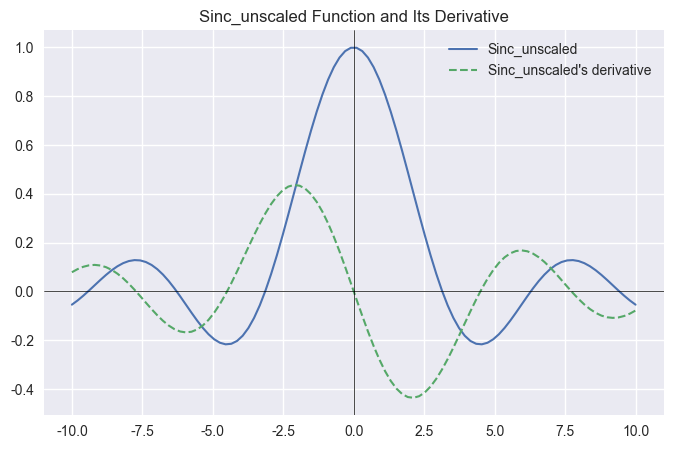

In [33]:
def sinc_unscaled(x):
    # 避免除以零，对于 x=0 的情况，sinc 函数定义为 1
    return np.where(np.abs(x) < 1e-7, 1.0, np.sin(x) / (x))

def sinc_unscaled_grad(x):
    # 使用商法则求导: (sin(x)/x)' = (x*cos(x) - sin(x)) / x^2
    sin_x = np.sin(x)
    cos_x = np.cos(x)
    
    # 处理 x=0 的极限情况（此时导数为0）
    small = np.abs(x) < 1e-7
    grad = np.where(small, 0.0, (x * cos_x - sin_x) / (x ** 2))
    
    return grad

plot_activation(sinc_unscaled, sinc_unscaled_grad, "Sinc_unscaled")

### ArcTan
ArcTan 是一种有界、平滑、单调递增的激活函数，输出范围为 (-\frac{\pi}{2}, \frac{\pi}{2})，接近饱和时梯度趋近于零。

其特点包括：
- 输出自动归一化到有限区间，有助于稳定训练；
- 处处连续可导，无尖锐转折；
- 比 Tanh 更缓慢地饱和，对异常值更鲁棒。

适用场景：
- 回归任务的输出层，当输出需要有界但不强制在 [-1,1] 时（相比 Tanh 更宽）；
- RBF 网络或函数逼近系统中作为隐藏层激活，用于建模平滑非线性映射；
- 强化学习策略网络，输出连续动作且需限制范围；
- 某些物理系统建模中，需要输出对输入变化敏感但又不爆炸的场景。

$$ \text{ArcTan}(x) = \tan^{-1}(x)

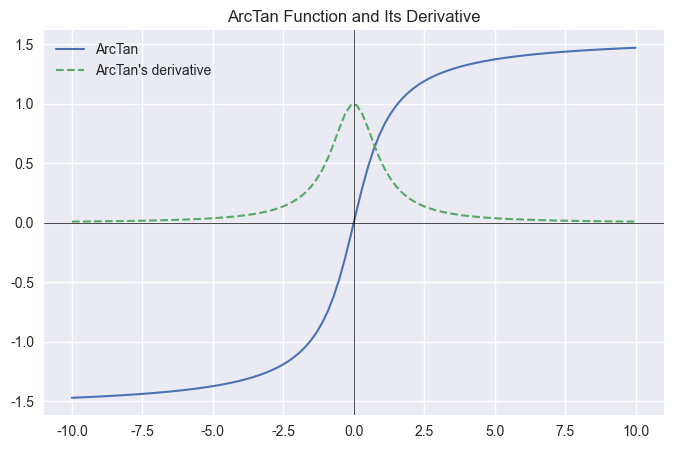

In [34]:
def arctan(x):
    return np.arctan(x)

def arctan_grad(x):
    return 1 / (1 + np.power(x, 2))

plot_activation(arctan, arctan_grad, "ArcTan")

### LogSigmoid
LogSigmoid 是 Sigmoid 的对数形式，核心价值在于数值稳定的损失计算，是深度学习框架内部实现的重要组成部分，但一般不直接作为网络层的激活函数暴露给用户

$$ \text{LogSigmoid}(x) = \ln(\sigma(x)) = \ln\left(\frac{1}{1 + e^{-x}}\right) = -\ln(1 + e^{-x})

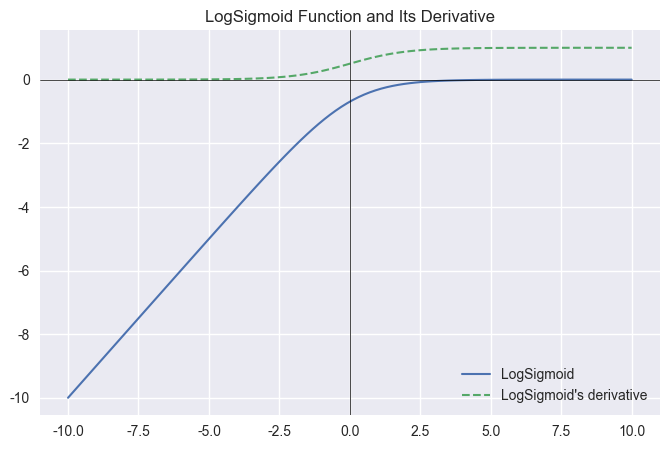

In [35]:
def log_sigmoid(x):
    """
    LogSigmoid 激活函数：f(x) = log(sigmoid(x)) = -log(1 + exp(-x))
    
    公式等价于：f(x) = -softplus(-x)
    输出范围: (-∞, 0)
    
    优点：数值稳定，常用于损失函数（如 BCEWithLogitsLoss 的组成部分）或概率对数空间建模。

    注意：在 x 很大时稳定，但 x 很小时可能下溢。
    """
    return -np.log(1 + np.exp(-x))

def log_sigmoid_stable(x):
    """
    数值稳定的 LogSigmoid 实现，避免 exp(-x) 溢出。
    使用分段函数：
        x >= 0: -log(1 + exp(-x))
        x <  0: x - log(1 + exp(x))
    """
    return np.where(x >= 0,
                    -np.log(1 + np.exp(-x)),
                    x - np.log(1 + np.exp(x)))

def log_sigmoid_grad(x):
    """
    LogSigmoid 的梯度。恰好等于 Sigmoid 函数本身
    推导：
        f(x) = log(σ(x)) = -log(1 + exp(-x))
        f'(x) = σ(x) = 1 / (1 + exp(-x))
    """
    return sigmoid(x)

plot_activation(log_sigmoid_stable, log_sigmoid_grad, 'LogSigmoid')

## 自动化搜索与结构创新

### TanhExp (Tanh Exponential Activation)
TanhExp 是一种结合指数与双曲正切的自门控激活函数，在保持 ReLU 风格的同时增强非线性表达能力，适合对性能有更高要求的视觉任务。
来自论文《TanhExp: A smooth activation function with high convergence speed for lightweight neural networks》


$$ \text{TanhExp}(x) = x \cdot \tanh(e^x)

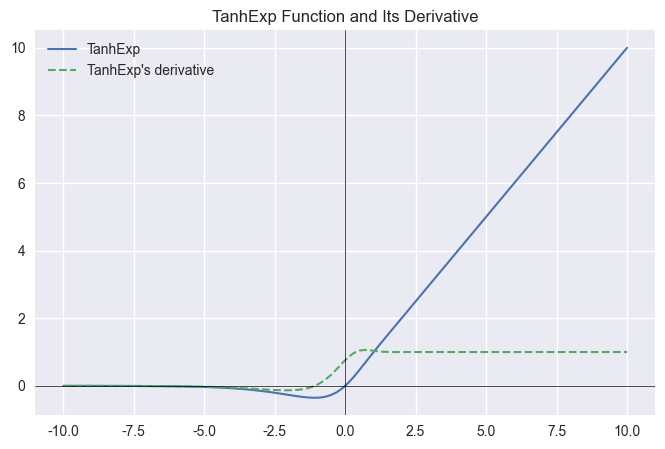

In [36]:
def tanhexp(x):
    """
    TanhExp: f(x) = x * tanh(exp(x))

    特性：非单调、有界梯度、在负区域有非零输出。
    """
    return x * np.tanh(np.exp(x))

def tanhexp_grad(x):
    """
    TanhExp 梯度（使用链式法则）
    f(x) = x * tanh(exp(x))
    f'(x) = tanh(exp(x)) + x * sech^2(exp(x)) * exp(x)
    """
    exp_x = np.exp(x)
    tanh_e = np.tanh(exp_x)
    sech2_e = 1 - tanh_e**2  # sech^2(x) = 1 - tanh^2(x)
    return tanh_e + x * sech2_e * exp_x

plot_activation(tanhexp, tanhexp_grad, 'TanhExp')

### PAU (Power Activation Unit)
PAU 是一种基于幂函数的可学习激活函数。适合研究场景，但因计算开销大、稳定性差，不推荐用于主流深度学习模型或大规模网络。在实际应用中，更推荐使用 Swish、GELU 等高效且稳定的激活函数。

$$ \text{PAU}(x) = \sum_{i=1}^{n} a_i x^{b_i}

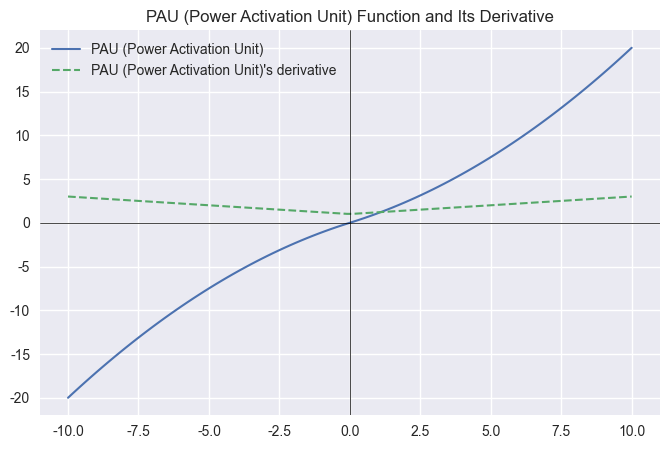

In [37]:
def pau(x, a1=1.0, a2=0.1, b1=1.0, b2=2.0):
    """
    PAU: Power Activation Unit (简化版，K=2)
    
    f(x) = a1 * x^b1 + a2 * x^b2
    
    参数：
        x: 输入
        a1, a2: 幂项的系数
        b1, b2: 幂指数（可为实数，如 0.5, 1.5, 2.0 等）
    
    注意：
        - 当 x < 0 且 b_k 非整数时，x^b_k 可能为复数
        - 此处使用 np.power 并允许 warning（或限制 b_k 为整数）
    """
    # 处理负数的幂运算（避免复数）
    # 方法：对负数取绝对值并保留符号
    def safe_power(x, b):
        return np.sign(x) * np.power(np.abs(x), b)
    
    term1 = a1 * safe_power(x, b1)
    term2 = a2 * safe_power(x, b2)
    return term1 + term2

def pau_grad(x, a1=1.0, a2=0.1, b1=1.0, b2=2.0):
    """
    修正后的梯度计算：
    f'(x) = a1*b1*x^(b1-1) + a2*b2*x^(b2-1)
    （严格处理x=0和负数情况）
    """
    def safe_grad(x, a, b):
        # 处理x=0和负数
        if b == 1:
            return np.ones_like(x) * a
        mask = x >= 0
        pos_part = a * b * np.power(np.maximum(x, 1e-7), b-1) * mask
        neg_part = a * b * np.power(np.maximum(-x, 1e-7), b-1) * (~mask)
        return pos_part + neg_part
    
    return safe_grad(x, a1, b1) + safe_grad(x, a2, b2)

plot_activation(lambda x: pau(x, a1=1.0, a2=0.1, b1=1.0, b2=2.0),
                lambda x: pau_grad(x, a1=1.0, a2=0.1, b1=1.0, b2=2.0),
                'PAU (Power Activation Unit)')

###  Learnable Sigmoid
Learnable Sigmoid 是标准 Sigmoid 的可学习扩展版本

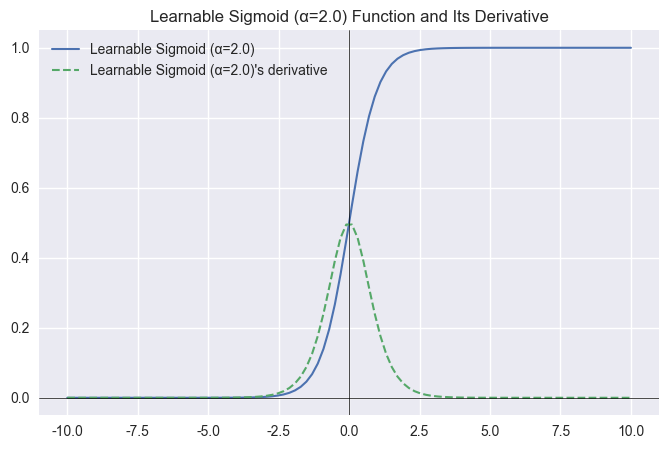

In [38]:
def learnable_sigmoid(x, alpha=1.0, beta=0.0):
    """
    Learnable Sigmoid: f(x) = 1 / (1 + exp(-(alpha * x + beta)))
    
    参数：
        x: 输入
        alpha: 控制斜率（>1 更陡，<1 更平缓）
        beta: 控制偏移（>0 右移，<0 左移）
    
    输出范围: (0, 1)
    """
    return 1 / (1 + np.exp(-(alpha * x + beta)))

def learnable_sigmoid_grad(x, alpha=1.0, beta=0.0):
    """
    Learnable Sigmoid 梯度：
    f(x) = sigmoid(alpha*x + beta)
    f'(x) = alpha * f(x) * (1 - f(x))
    """
    s = learnable_sigmoid(x, alpha, beta)
    return alpha * s * (1 - s)

plot_activation(lambda x: learnable_sigmoid(x, alpha=2.0, beta=0.0),
                lambda x: learnable_sigmoid_grad(x, alpha=2.0, beta=0.0),
                'Learnable Sigmoid (α=2.0)')

### Parametric Softplus
Parametric Softplus 是标准 Softplus 函数的可学习扩展版本

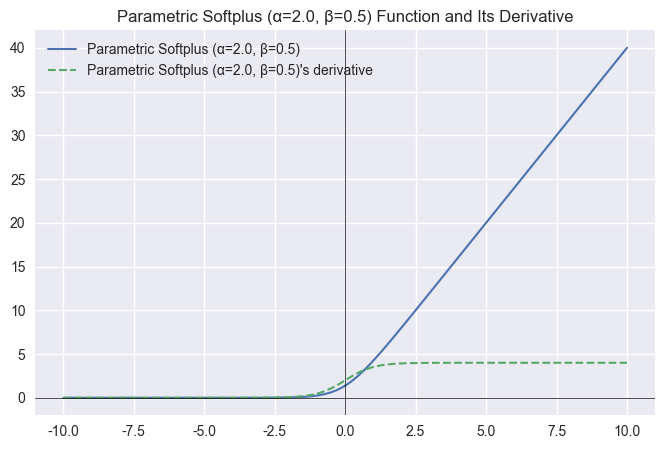

In [39]:
def parametric_softplus(x, alpha=1.0, beta=1.0):
    """
    Parametric Softplus: f(x) = (1/β) * log(1 + exp(α * x))
    
    参数：
        x: 输入
        alpha: 输入缩放因子（>1 更陡，<1 更平缓）
        beta: 输出温度系数（>1 更平滑，<1 更陡峭）
    
    输出范围: (0, ∞)
    
    注意：
        - 当 alpha*x 过大时，exp(alpha*x) 可能溢出
        - 此处使用数值稳定版本（见梯度部分）
    """
    # 数值稳定版本：避免 exp 溢出
    # 使用恒等式：log(1 + exp(z)) = z + log(1 + exp(-z)) for z > 0
    z = alpha * x
    # 分段处理
    return np.where(z > 20, z / beta,
           np.where(z < -20, np.exp(z) / beta,
                    np.log(1 + np.exp(z)) / beta))

def parametric_softplus_grad(x, alpha=1.0, beta=1.0):
    """
    Parametric Softplus 梯度：
    f(x) = log(1 + exp(αx)) / β
    f'(x) = (α / β) * sigmoid(αx)
    """
    sigmoid_alpha_x = 1 / (1 + np.exp(-alpha * x))
    return (alpha / beta) * sigmoid_alpha_x

plot_activation(lambda x: parametric_softplus(x, alpha=2.0, beta=0.5),
                lambda x: parametric_softplus_grad(x, alpha=2.0, beta=0.5),
                'Parametric Softplus (α=2.0, β=0.5)')

### Dynamic ReLU
Dynamic ReLU 是一种内容感知的可变形激活函数，其参数（如斜率、阈值）由输入数据动态生成，而非全局共享。它最初用于轻量级网络（如 RepVGG、DyNet），能显著提升性能而几乎不增加计算量。
这里实现一个 简化可学习版本。

$$ \text{DY-ReLU}(x) = \max(0, a(\mathbf{s}) \cdot x + b(\mathbf{s}))

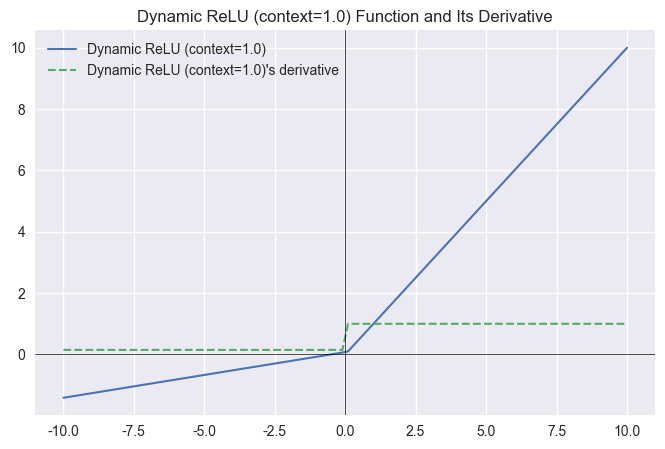

In [40]:
def dynamic_relu(x, global_context=0.0, a_min=0.01, a_max=0.2, b_scale=0.1):
    """
    Dynamic ReLU (简化 1D 版本，用于可视化)
    
    假设 'global_context' 是来自输入的统计量（如均值、最大值）
    用它生成负半轴的斜率 a 和偏置 b
    
    f(x) = 
        a * x + b,  x < 0
        x,          x >= 0
    
    参数：
        x: 输入
        global_context: 模拟全局上下文（如 batch 的均值）
        a_min, a_max: 动态斜率范围
        b_scale: 动态偏置的缩放因子
    
    注意：真实版本中 a,b 由小型网络生成
    """
    # 模拟动态参数生成（真实中为小型网络）
    a = a_min + (a_max - a_min) * sigmoid(global_context)  # a ∈ [a_min, a_max]
    b = b_scale * tanh(global_context)                     # b ∈ [-b_scale, b_scale]
    
    return np.where(x < 0, a * x + b, x)

def dynamic_relu_grad(x, global_context=0.0, a_min=0.01, a_max=0.2, b_scale=0.1):
    """
    Dynamic ReLU 梯度
    注意：a 和 b 依赖于 global_context，但在对 x 求导时视为常数
    """
    a = a_min + (a_max - a_min) * sigmoid(global_context)
    
    return np.where(x < 0, a, 1.0)

# 可视化：固定 global_context = 1.0（激活动态性）
plot_activation(lambda x: dynamic_relu(x, global_context=1.0),
                lambda x: dynamic_relu_grad(x, global_context=1.0),
                'Dynamic ReLU (context=1.0)')

### EvoNorm
EvoNorm 并非传统意义上的激活函数，而是一类结合归一化与激活的层，由 Google Research 在论文《Evolving Normalization-Activation Functions》中提出。
它的目标是替代 BN + ReLU 或 BN + Swish，在无 Batch Normalization 的情况下提供稳定激活。
由于 EvoNorm 依赖于 统计量（方差、均值），这里做简化模拟。


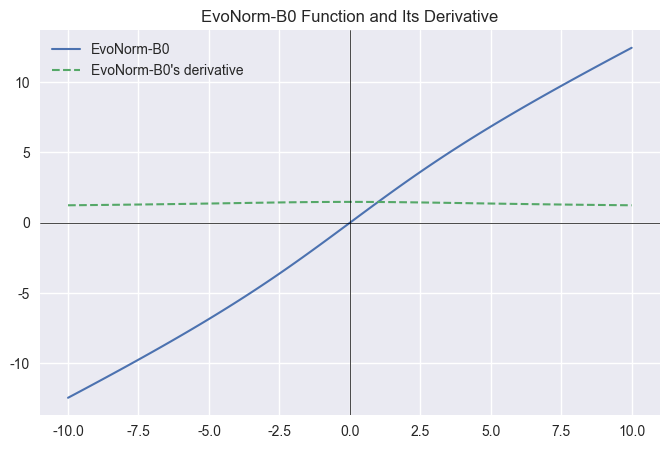

In [41]:
def evonorm_b0(x, gamma=1.0, beta=0.0, v=0.1, eps=1e-5):
    """
    EvoNorm-B0:
    f(x) = gamma * x / sqrt(v * x^2 + (1-v) * running_v + eps) + beta * x
    
    参数：
        v: 控制动态方差权重（可学习）
        running_v: 运行时方差（训练中更新）
    
    此处为简化版：使用固定 v 和模拟 running_v
    """
    # 模拟运行方差（真实中为 EMA 更新）
    running_v = np.mean(x**2)  # 简化：用当前方差
    var_dynamic = v * x**2 + (1 - v) * running_v
    x_normalized = x / np.sqrt(var_dynamic + eps)
    return gamma * x_normalized + beta * x

def evonorm_b0_grad(x, gamma=1.0, beta=0.0, v=0.1, eps=1e-5):
    """
    EvoNorm-B0 梯度（简化版）
    """
    running_v = np.mean(x**2)
    var_dynamic = v * x**2 + (1 - v) * running_v
    denom = np.sqrt(var_dynamic + eps)
    
    # 简化梯度
    grad = gamma / denom + beta
    return grad

plot_activation(lambda x: evonorm_b0(x, gamma=2.0, beta=1.0, v=0.5),
                lambda x: evonorm_b0_grad(x, gamma=2.0, beta=1.0, v=0.5),
                'EvoNorm-B0')

## Transformer 与大模型专用

### GeGLU（Gated Linear Unit using GELU）
GeGLU 是 GLU 家族的一种重要变体，使用 GELU 作为门控非线性函数，相比原始 GLU（使用 Sigmoid）具有更平滑、更现代的特性。

主要应用于：
- Transformer 及其变体 的前馈网络（FFN）中，作为 Linear -> Activation -> Linear 的替代；
- 被 Google 的 T5 模型、DeepMind 的 Chinchilla 以及 PaLM 等大型语言模型广泛采用；
- 在视觉 Transformer（ViT）、多模态模型中也常见。

$$ \text{GeGLU}(x) = x \cdot \text{GELU}(W_g x + b_g)

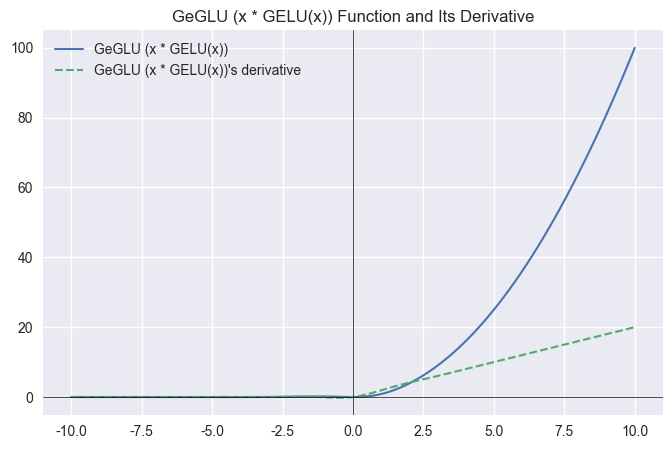

In [42]:
def geglu(x, split_ratio=0.5):
    """
    GeGLU: Gated GELU
    f(x) = x1 * GELU(x2)
    
    参数：
        x: 输入向量（模拟为 1D 数组）
        split_ratio: 分割比例（默认 0.5 → 均分）
    
    注意：
        - 真实中为线性变换后拆分
        - 此处简化：直接将输入 x 拆为 x1 和 x2
    """
    mid = int(len(x) * split_ratio)
    # 为可视化，我们让 x1 和 x2 共享相同的 x 轴（广播模拟）
    # 实际中 x1 和 x2 是线性投影后的不同特征
    x1 = x
    x2 = x  # 简化：假设 x2 与 x1 相同（仅用于形状匹配）
    
    gelu_x2 = gelu(x2)  # 使用已定义的 GELU 函数
    return x1 * gelu_x2

def geglu_grad(x, split_ratio=0.5):
    """
    GeGLU 梯度（简化版）
    f(x) = x * GELU(x)
    f'(x) = GELU(x) + x * GELU'(x)
    """
    g = gelu(x)
    g_grad = gelu_grad(x)
    return g + x * g_grad

# 可视化：注意 GeGLU 本质是逐元素操作，但依赖门控
plot_activation(lambda x: geglu(x, split_ratio=0.5),
                lambda x: geglu_grad(x, split_ratio=0.5),
                'GeGLU (x * GELU(x))')

### SwiGLU
SwiGLU 是当前大语言模型中最流行的门控机制之一。它是 GLU 家族 的一种高性能变体，使用 Swish（或 SiLU） 作为门控函数，结合了门控机制与平滑非线性的优势。

主要应用于：
- Llama 系列大模型（Llama, Llama2, Llama3）的前馈网络（FFN）中，作为核心激活结构；
- 其他现代大语言模型（如 Phi-2、Falcon）中也有使用；
- 替代传统的 ReLU + Linear 或 GeGLU 结构，提升模型表达能力；
- 特别适合自回归语言建模任务。

优点：
- 门控机制允许模型动态控制信息流动，增强非线性表达；
- Swish 函数平滑且无上界、有下界，梯度特性优于 ReLU 和 Sigmoid；
- 在相同参数量下，SwiGLU 比 ReLU、GeLU、GeGLU 等具有更强的建模能力；

$$ \text{SwiGLU}(x) = x \cdot \text{Swish}(W_g x + b_g)

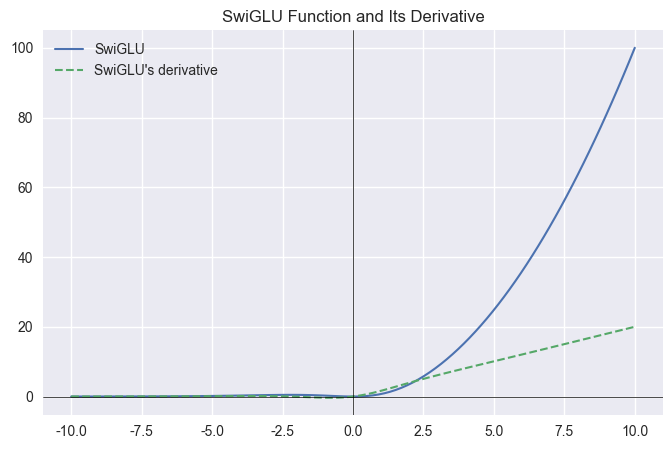

In [43]:
def swiglu(x):
    """
    SwiGLU: x1 * Swish(x2)
    简化版：假设 x1 == x2 == x（用于 1D 可视化）
    """
    return x * swish(x)

def swiglu_grad(x):
    """
    SwiGLU 梯度：
    f(x) = x * swish(x)
    f'(x) = swish(x) + x * swish'(x)
    """
    s = sigmoid(x)
    swish_val = x * s
    swish_grad = s + x * s * (1 - s)
    return swish_val + x * swish_grad

plot_activation(swiglu, swiglu_grad, 'SwiGLU')

### ReGLU
ReGLU 是 GLU（Gated Linear Unit） 家族的一种变体，使用 ReLU 作为门控函数，结合了门控机制与稀疏非线性的特性。在 Google 的《GLU Variants Improve Transformer》中提出。

主要应用于：
- Transformer 的前馈网络（FFN） 中，作为传统 Linear -> ReLU -> Linear 结构的改进；
- 在某些高效模型或早期 GLU 变体研究中出现；
- 与 GeGLU、SwiGLU 并列，作为探索不同门控函数性能的基准之一。

优点：
- 门控机制允许模型动态控制信息流动，增强表达能力；
- ReLU 计算简单、速度快，无指数或 erf 运算，效率高；
- 相比标准 FFN，引入了特征交互，提升建模能力。

缺点：
- ReLU 存在“神经元死亡”问题，可能导致部分门控通道永久关闭；
- 不如 GeGLU 或 SwiGLU 平滑，在训练稳定性上略逊一筹；
- 实验表明，在大模型中性能通常低于 SwiGLU 和 GeGLU。

$$ \text{ReGLU}(x) = x \cdot \text{ReLU}(W_g x + b_g)

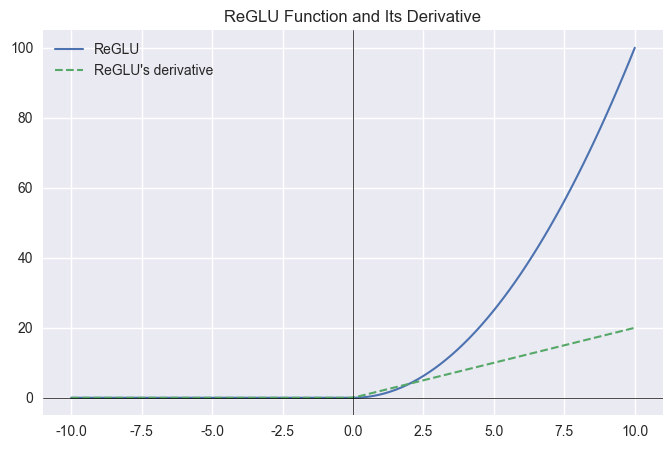

In [44]:
def reglu(x):
    """
    ReGLU: x1 * ReLU(x2)
    简化：x1 == x2 == x
    """
    return x * relu(x)

def reglu_grad(x):
    """
    ReGLU 梯度：
    f(x) = x * max(0, x)
    f'(x) = max(0,x) + x * (1 if x>0 else 0)
           = ReLU(x) + (x if x>0 else 0)
    """
    return np.where(x > 0, x + x, 0.0)

plot_activation(reglu, reglu_grad, 'ReGLU')

## 轻量化与边缘设备专用

### Hard Swish
Hard Swish 是 Swish 函数的分段线性近似，计算效率高，无指数或 sigmoid 操作，特别适合移动端和嵌入式设备上的深度网络（如 MobileNetV3、EfficientNet-Lite）。在保持接近 Swish 性能的同时，显著降低计算开销并提升量化稳定性。推荐用于资源受限场景下的隐藏层激活。

$$ \text{HardSwish}(x) = x \cdot \frac{\text{ReLU6}(x + 3)}{6}

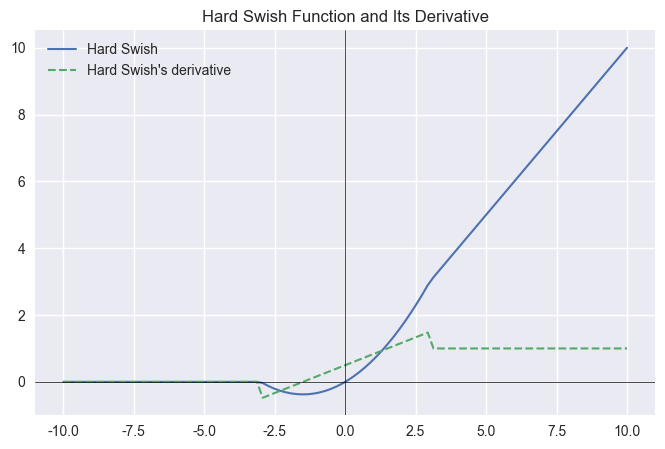

In [45]:
def hard_swish(x):
    return x * np.clip(x + 3, 0, 6) / 6

def hard_swish_grad(x):
    cond1 = x <= -3
    cond2 = x < 3
    return np.where(cond1, 0, np.where(cond2, (2*x + 3)/6, 1))

plot_activation(hard_swish, hard_swish_grad, 'Hard Swish')

### Hard Sigmoid
Hard Sigmoid 是标准 Sigmoid 的分段线性近似，计算更高效，输出范围 [0, 1]。

$$ \text{HardSigmoid}(x) = \begin{cases}
0, & \text{if } x \leq -2.5 \\
0.2x + 0.5, & \text{if } -2.5 < x < 2.5 \\
1, & \text{if } x \geq 2.5
\end{cases}

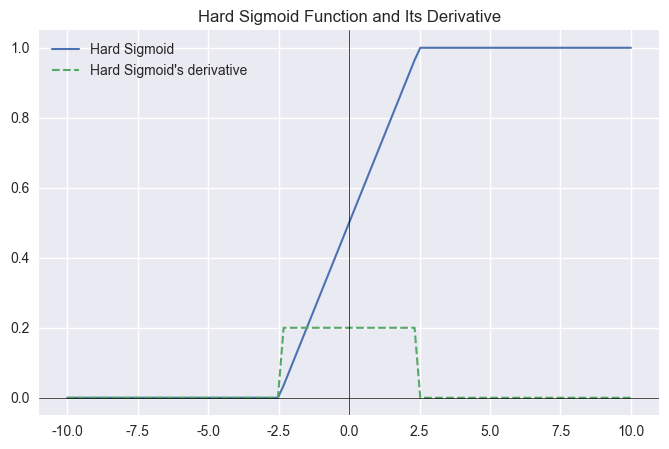

In [46]:
def hard_sigmoid(x):
    """Hard Sigmoid激活函数：分段线性近似"""
    return np.clip((0.2 * x) + 0.5, 0.0, 1.0)

def hard_sigmoid_grad(x):
    """Hard Sigmoid的梯度计算"""
    return np.where((x > -2.5) & (x < 2.5), 0.2, 0.0)

plot_activation(hard_sigmoid, hard_sigmoid_grad, 'Hard Sigmoid')

### QuantReLU（Quantized ReLU）
QuantReLU 并不是一个“新”的非线性函数，而是 ReLU 与量化操作的结合，用于模拟或实现低精度神经网络（如 INT8、INT4 甚至二值化网络）。

主要应用于：
- 模型压缩与加速：在移动端、嵌入式设备或边缘计算中部署轻量模型；
- 量化感知训练（Quantization-Aware Training, QAT）：在训练时模拟量化误差，提升量化后模型精度；
- 低比特神经网络：配合定点运算硬件（如 TPU、NPU）提升推理效率。

$$ \text{QuantReLU}(x) = \Delta \cdot \left\lfloor \frac{\max(0, x)}{\Delta} + u \right\rfloor

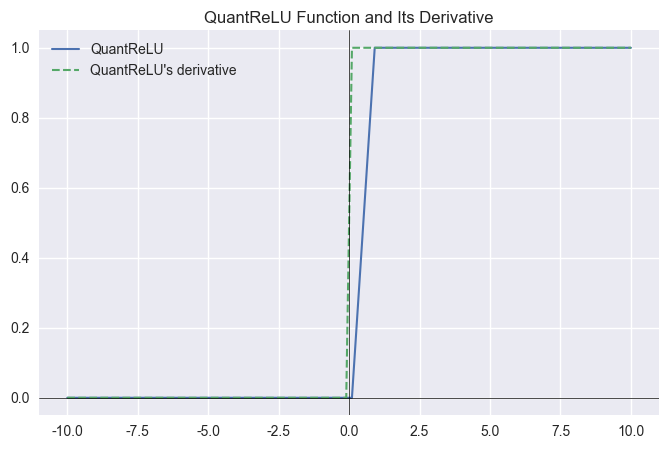

In [47]:
def quant_relu(x, levels=4):
    """
    Quantized ReLU: 将 ReLU 的输出限制在有限个离散值上。将 [0, 1] 区间等分为 levels + 1 个离散值（例如 levels=4 → 0, 0.25, 0.5, 0.75, 1.0）。
    
    参数:
        x: 输入数组
        levels: 量化等级数（例如 4 表示 [0, 1/3, 2/3, 1]）。
    返回:
        量化后的 ReLU 输出
    """
    x_clipped = np.clip(x, 0, 1)  # 先做 ReLU 并限制在 [0,1]
    return np.round(x_clipped * levels) / levels

def quant_relu_grad(x, levels=4):
    """
    QuantReLU 的梯度（前向传播时为 1，但反向传播中量化不可导，通常使用 STE - Straight-Through Estimator）
    这里使用 STE：梯度在有效区间内视为 1，其余为 0
    """
    return (x > 0).astype(float)

plot_activation(lambda x: quant_relu(x, levels=4), lambda x: quant_relu_grad(x, levels=4), 'QuantReLU')

### LUT-based Activation
LUT-based Activation 是一种通用、灵活的非线性建模方法，将激活函数视为一个“黑箱”映射，通过查表实现，而非解析表达式。

主要应用于：
- 硬件加速与边缘计算：在 FPGA、ASIC 或低功耗芯片上，查表比计算 exp, tanh, erf 等函数更快、更节能；
- 模型压缩：用小规模 LUT 替代复杂激活函数（如 GELU、Swish），减少计算开销；
- 可学习激活函数：让网络自动学习最优的非线性形状（如 PULP、PAU 等）；
- 神经拟态计算（Neuromorphic Computing）：模拟生物神经元的非线性响应。

优点：
- 计算高效：O(1) 查表操作，适合资源受限设备；
- 表达能力强：理论上可逼近任意一维函数；
- 易于硬件实现：只需存储器和索引逻辑；
- 支持可学习机制：LUT 条目可作为参数训练。

缺点：
- 内存占用：高精度 LUT 需要大量存储（如 8-bit 精度需 256 项，10-bit 需 1024 项）；
- 维度灾难：难以扩展到多维激活（如 (x,y) 映射），通常限于逐元素（element-wise）操作；
- 插值误差：对未在表中的值需插值（线性/最近邻），可能引入噪声；
- 训练挑战：稀疏梯度更新，需结合 STE（直通估计器）或平滑插值。

$$ y = \text{LUT}[ \text{index}(x) ]

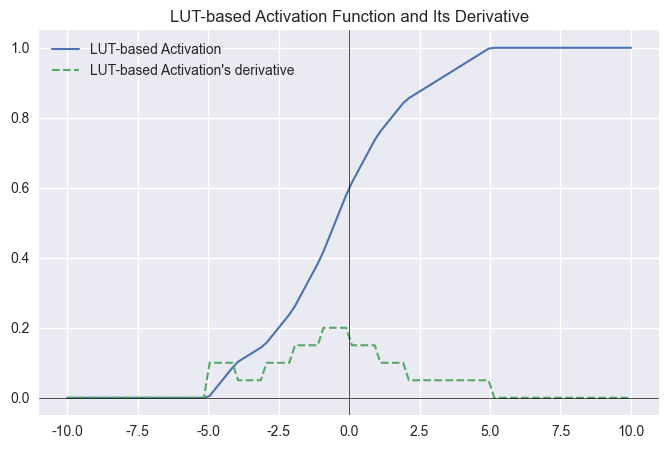

In [48]:
def lut_activation(x, lut=None, input_range=(-5, 5)):
    """
    基于查找表 (LUT) 的激活函数。
    
    参数:
        x: 输入数组
        lut: 查找表，形状为 (N,)，对应 input_range 内的 N 个等分点
        input_range: LUT 覆盖的输入范围
    
    返回:
        插值得到的激活值
    """
    if lut is None:
        # 默认使用类似 Sigmoid 的查找表作为示例
        lut = np.array([0.00, 0.05, 0.12, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.88, 0.95, 1.00])
    
    x_clipped = np.clip(x, input_range[0], input_range[1])
    x_norm = (x_clipped - input_range[0]) / (input_range[1] - input_range[0])  # 归一化到 [0,1]
    indices = x_norm * (len(lut) - 1)
    
    # 使用 numpy 插值
    return np.interp(indices, np.arange(len(lut)), lut)

def lut_activation_grad(x, lut=None, input_range=(-5, 5)):
    """
    LUT 激活函数的近似梯度（使用有限差分法）
    """
    h = 1e-5
    return (lut_activation(x + h, lut, input_range) - lut_activation(x - h, lut, input_range)) / (2 * h)

# 创建一个示例 LUT（模拟非线性变换）
example_lut = np.array([0.0, 0.1, 0.15, 0.25, 0.4, 0.6, 0.75, 0.85, 0.9, 0.95, 1.0])

plot_activation(
    lambda x: lut_activation(x, lut=example_lut, input_range=(-5, 5)),
    lambda x: lut_activation_grad(x, lut=example_lut, input_range=(-5, 5)),
    'LUT-based Activation'
)

## 整体对比

| 激活函数 | 数学形式 | 输出范围 | 是否可导 | 零中心 | 计算成本 | 适用场景 | 优点 | 缺点 | 推荐使用 |
|---------|--------|--------|--------|--------|--------|--------|------|------|----------|
| Sigmoid | $\frac{1}{1 + e^{-x}}$ | $(0, 1)$ | 是 | 否 | ⭐⭐ | 二分类输出、门控机制 | 输出概率解释 | 梯度消失，非零中心 | ⚠️ 仅用于输出或门控 |
| Tanh | $\frac{e^x - e^{-x}}{e^x + e^{-x}}$ | $(-1, 1)$ | 是 | 是 | ⭐⭐ | RNN、LSTM、输出层 | 零中心，输出有界 | 梯度消失严重 | ⚠️ 一般不用于深层CNN |
| Linear | $x$ | $(-\infty, +\infty)$ | 是 | 是 | ⭐ | 输出层（回归任务）、线性变换层、残差连接 | 无非线性，保留原始信息 | 无法引入非线性表达能力 | ✅ 仅用于输出层或特定结构 |
| Softmax | $\frac{e^{x_i}}{\sum_j e^{x_j}}$ | $(0, 1)$, 和为1 | 是 | 否 | ⭐⭐⭐ | 多分类输出层 | 输出为概率分布 | 数值不稳定 | ✅ 多分类任务必须 |
| ReLU | $\max(0, x)$ | $[0, +\infty)$ | 在 $x=0$ 处不可导 | 否 | ⭐ | 通用隐藏层（CNN、MLP） | 简单高效，训练快 | 神经元死亡问题 | ✅ 广泛推荐（基础选择） |
| ReLU-6 | $\min(\max(0, x), 6)$ | $[0, 6]$ | 在 $x=0,6$ 处不可导 | 否 | ⭐ | 移动端CNN、轻量模型（如MobileNet、EfficientNet-Lite） | 有界输出稳定训练，硬件友好 | 饱和特性可能限制表达能力 | ✅ 轻量模型与量化场景首选 |
| Leaky ReLU | $\begin{cases} x & x > 0 \\ \alpha x & x \leq 0 \end{cases}$ ($\alpha \approx 0.01$) | $(-\infty, +\infty)$ | 在 $x=0$ 处不可导 | 近似是 | ⭐ | 需缓解死亡问题的网络 | 缓解死亡问题 | $\alpha$ 需手动设置 | ✅ 推荐替代 ReLU |
| PReLU | $\begin{cases} x & x > 0 \\ \alpha x & x \leq 0 \end{cases}$ ($\alpha$ 可学习) | $(-\infty, +\infty)$ | 在 $x=0$ 处不可导 | 近似是 | ⭐⭐ | CNN、小样本任务 | 自适应负斜率 | 易过拟合，训练不稳定 | ⚠️ 实验性使用 |
| ELU | $\begin{cases} x & x > 0 \\ \alpha (e^x - 1) & x \leq 0 \end{cases}$ | $(-\alpha, +\infty)$ | 是 | 近似是 | ⭐⭐ | 深层网络、RNN | 缓解死亡，输出近零中心 | 计算慢（含 $\exp$） | ✅ 深层网络推荐 |
| SELU | $\lambda \begin{cases} x & x > 0 \\ e^x - 1 & x \leq 0 \end{cases}$ ($\lambda \approx 1.05$) | $(-\alpha\lambda, +\infty)$ | 是 | 是（自归一化） | ⭐⭐ | Self-Normalizing Networks | 自归一化，稳定训练 | 需特定初始化和架构 | ⚠️ 仅用于全连接网络 |
| CELU | $\begin{cases} x & x > 0 \\ \alpha (\exp(x/\alpha) - 1) & x \leq 0 \end{cases}$ | $(-\alpha, +\infty)$ | 是（处处可导） | 近似是 | ⭐⭐ | 深层网络、需要平滑梯度的场景 | 连续可导，缓解神经元死亡，输出近零中心 | 计算较重（含 $\exp$），参数需调优 | ⚠️ 可作为 ELU 的平滑替代 |
| GELU | $x \Phi(x)$ 或 $x \cdot \sigma(1.702x)$ | $(-0.17, +\infty)$ | 是 | 近似是 | ⭐⭐⭐ | Transformer、大模型 | 平滑、有理论依据 | 计算较重 | ✅ 现代模型首选 |
| Softplus | $\log(1 + e^x)$ | $(0, +\infty)$ | 是 | 否 | ⭐⭐⭐ | 替代 ReLU 的平滑版本、概率输出、正数约束 | 平滑、无“死亡”问题、输出正数 | 计算重（含 `exp` 和 `log`），$x \to -\infty$ 时趋于 0 慢 | ⚠️ 实验或特定场景使用 |
| Softsign | $\frac{x}{1 + \lvert x \rvert}$ | $(-1, 1)$ | 在 $x=0$ 处可导 | 是 | ⭐⭐ | 替代 Tanh 的低成本激活、RNN 实验模型 | 有界、零中心、无指数运算 | 饱和严重，梯度在 $\lvert x \rvert$ 大时极小，表达能力弱 | ⚠️ 小众选择，不推荐主流使用 |
| Swish / SiLU | $x \cdot \sigma(\beta x)$ ($\beta=1$) | $(-0.26, +\infty)$ | 是 | 近似是 | ⭐⭐⭐ | 通用隐藏层、大模型 | 无上界有下界，性能优 | 计算开销较高 | ✅ 替代 ReLU 的现代选择 |
| HardSwish | $x \cdot \text{HardSigmoid}(x)$ | $[0, +\infty)$ | 分段可导 | 否 | ⭐⭐ | 移动端、轻量模型 | 无 $\exp$，硬件友好 | 精度略低 | ✅ MobileNet 等轻量模型 |
| GLU | $x \cdot \sigma(W_g x)$ | $(-\infty, +\infty)$ | 是 | 是 | ⭐⭐⭐ | Transformer FFN | 门控机制增强表达 | 参数翻倍 | ✅ 结构性改进 |
| ReGLU | $x \cdot \text{ReLU}(W_g x)$ | $(-\infty, +\infty)$ | 分段可导 | 是 | ⭐⭐⭐ | 高效门控结构 | 计算快 | 不够平滑 | ⚠️ 实验性 |
| GeGLU | $x \cdot \text{GELU}(W_g x)$ | $(-\infty, +\infty)$ | 是 | 是 | ⭐⭐⭐⭐ | 大语言模型（T5, PaLM） | 高性能门控 | 计算重 | ✅ LLM 推荐 |
| SwiGLU | $x \cdot \text{Swish}(W_g x)$ | $(-\infty, +\infty)$ | 是 | 是 | ⭐⭐⭐⭐ | 大语言模型（Llama） | 性能优异，平滑 | 计算重 | ✅ 当前最主流 LLM 激活 |
| Mish | $x \cdot \tanh(\text{softplus}(x))$ | $(-0.31, +\infty)$ | 是 | 近似是 | ⭐⭐⭐⭐ | 视觉任务实验 | 平滑、无上界 | 计算极重，难部署 | ⚠️ 研究用途 |
| TanhExp | $x \cdot \tanh(e^x)$ | $(-\infty, +\infty)$ | 是 | 是 | ⭐⭐⭐⭐ | 实验性研究 | 自门控，理论强 | 计算极重，不稳定 | ❌ 不推荐 |
| LUT-based | $y = \text{LUT}[\text{index}(x)]$ | 可配置 | 是（若插值） | 可配置 | ⭐（查表） | 边缘设备、FPGA、QAT | 极速推理，硬件友好 | 内存占用高，精度受限 | ✅ 部署优化首选 |
| QuantReLU | $\Delta \cdot \text{round}(\max(0,x)/\Delta)$ | $[0, +\infty)$ 整数倍 | 是（STE 近似） | 否 | ⭐ | 量化模型、边缘部署 | 低比特，省存储 | 精度损失，需 QAT | ✅ 工业部署必备 |